In [1]:
import time
import warnings
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from optbinning import OptimalBinning
from joblib import Parallel, delayed
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_parquet('train_seg2.parquet')
oos = pd.read_parquet('oos_seg2.parquet')
oot = pd.read_parquet('oot_seg2.parquet')

In [3]:
target_col = "BAD_NEXT_12M"
train[target_col] = train[target_col].astype(int)

Binning 

Skip FLAG_DEPOSIT: Biến hằng số (1 unique value)

Processing: C_GIOITINH
   -> STATUS: OPTIMAL
   -> IV: 0.0000
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[M],128431,0.492904,115790,12641,0.098426,0.003197,0.000005,6.289952e-07
1,"[F, O]",132129,0.507096,119050,13079,0.098987,-0.0031,0.000005,6.098481e-07
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,260560,1.000000,234840,25720,0.098710,,0.000010,1.238843e-06


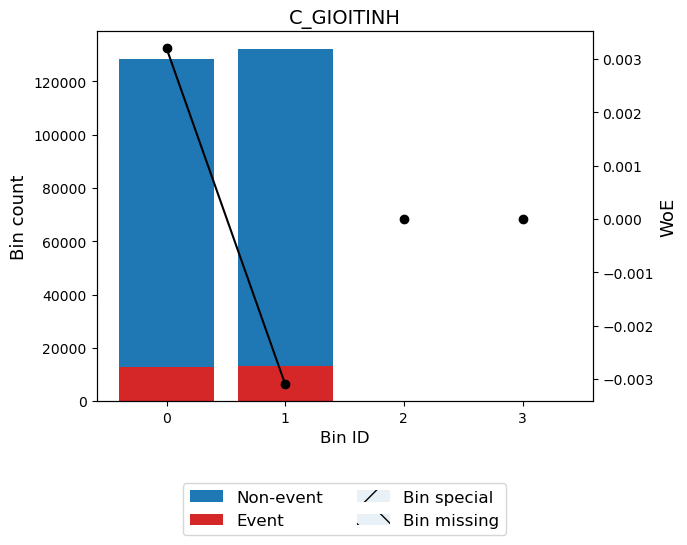


Processing: TRINHDO
   -> STATUS: OPTIMAL
   -> IV: 0.0571
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[4.0, 3.0]",38358,0.147214,35842,2516,0.065593,0.444815,0.024376,0.003022
1,"[2.0, nan]",131751,0.505646,119880,11871,0.090102,0.100757,0.004930,0.000616
2,[1.0],90451,0.347141,79118,11333,0.125294,-0.268414,0.027842,0.003470
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,260560,1.000000,234840,25720,0.098710,,0.057148,0.007108


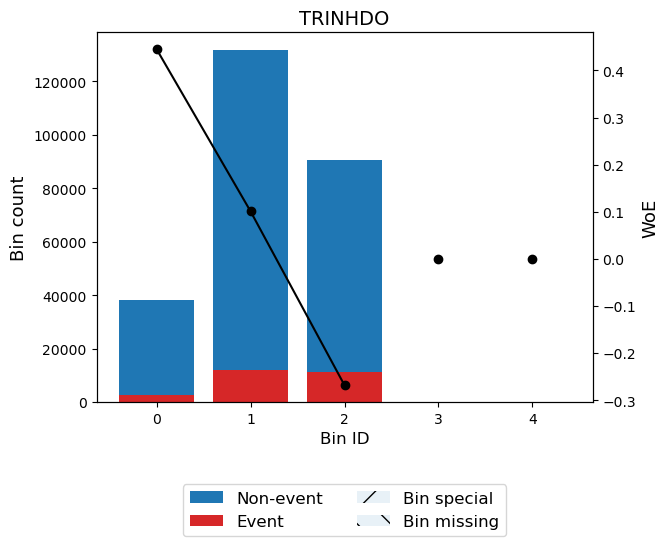


Processing: TTHONNHAN
   -> STATUS: OPTIMAL
   -> IV: 0.0395
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[Married],87200,0.334664,80693,6507,0.074622,0.306138,0.027741,0.003454
1,[Single],173360,0.665336,154147,19213,0.110827,-0.129316,0.011718,0.001464
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,260560,1.000000,234840,25720,0.098710,,0.039458,0.004918


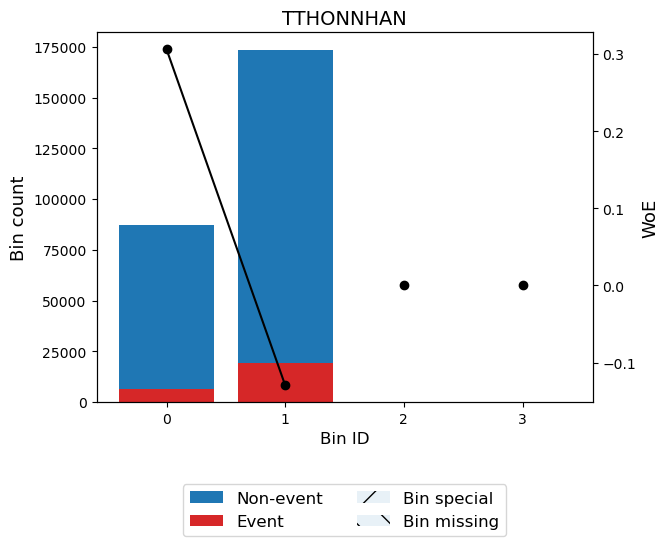


Processing: SOHUUNHA
   -> STATUS: OPTIMAL
   -> IV: 2.0227
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",184673,0.708754,158976,25697,0.139149,-0.389257,0.125399,0.015577
1,"[0.50, inf)",75887,0.291246,75864,23,0.000303,5.889568,1.897332,0.109188
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,260560,1.000000,234840,25720,0.098710,,2.022731,0.124765


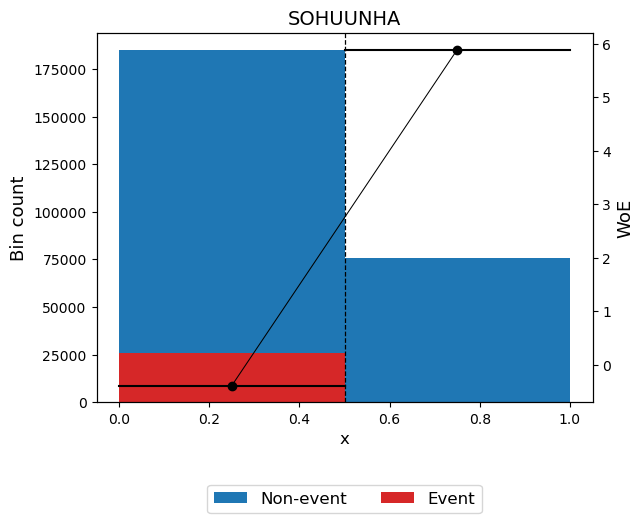


Processing: NHANVIENBIDV
   -> STATUS: OPTIMAL
   -> IV: 0.0000
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, inf)",260560,1.0,234840,25720,0.09871,0.0,0.0,0.0
1,Special,0,0.0,0,0,0.00000,0.0,0.0,0.0
2,Missing,0,0.0,0,0,0.00000,0.0,0.0,0.0
Totals,,260560,1.0,234840,25720,0.09871,,0.0,0.0


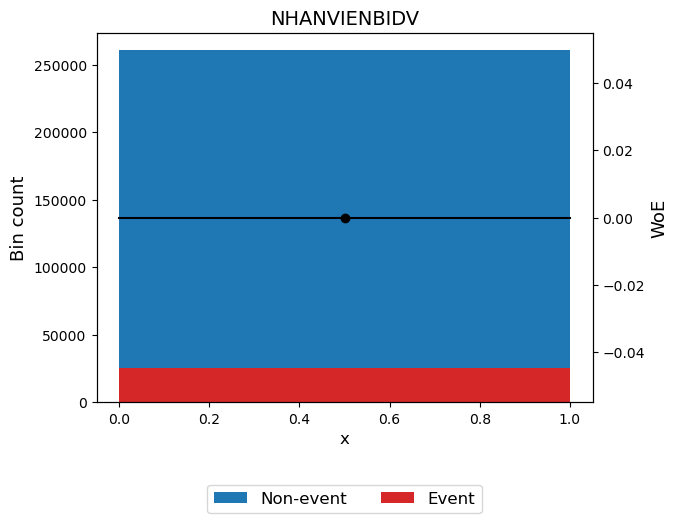


Processing: BASE_AUM
   -> STATUS: OPTIMAL
   -> IV: 0.0351
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 959000.50)",29278,0.112366,25039,4239,0.144784,-0.435528,0.025344,0.003143
1,"[959000.50, 1600603.50)",44966,0.172574,40235,4731,0.105213,-0.071035,0.000896,0.000112
2,"[1600603.50, 3297046.50)",94068,0.361022,85262,8806,0.093613,0.05866,0.001213,0.000152
3,"[3297046.50, 4954451.00)",44237,0.169777,40352,3885,0.087822,0.128882,0.002678,0.000335
4,"[4954451.00, inf)",48011,0.184261,43952,4059,0.084543,0.170526,0.005004,0.000625
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,260560,1.000000,234840,25720,0.098710,,0.035135,0.004366


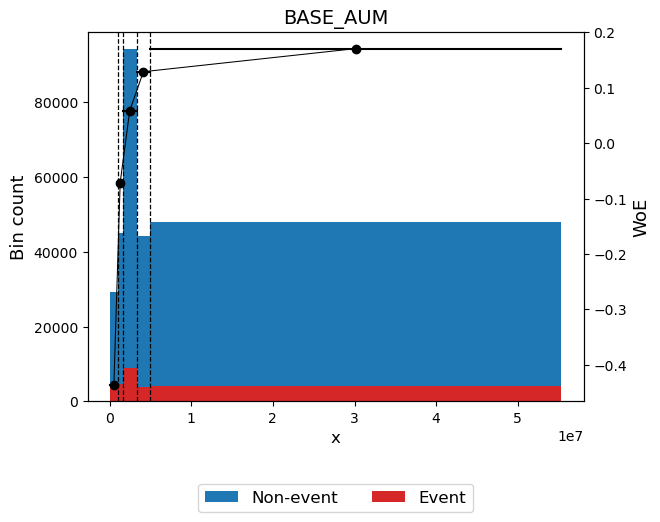


Processing: TUOI
   -> STATUS: OPTIMAL
   -> IV: 0.1564
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 23.50)",37280,0.143076,30817,6463,0.173364,-0.649663,0.077997,0.009582
1,"[23.50, 28.50)",40781,0.156513,35792,4989,0.122336,-0.241147,0.010023,0.001250
2,"[28.50, 33.50)",52048,0.199754,46951,5097,0.097929,0.008817,0.000015,0.000002
3,"[33.50, 39.50)",61074,0.234395,56163,4911,0.080411,0.225145,0.010855,0.001354
4,"[39.50, inf)",69377,0.266261,65117,4260,0.061404,0.515281,0.057532,0.007113
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,260560,1.000000,234840,25720,0.098710,,0.156423,0.019301


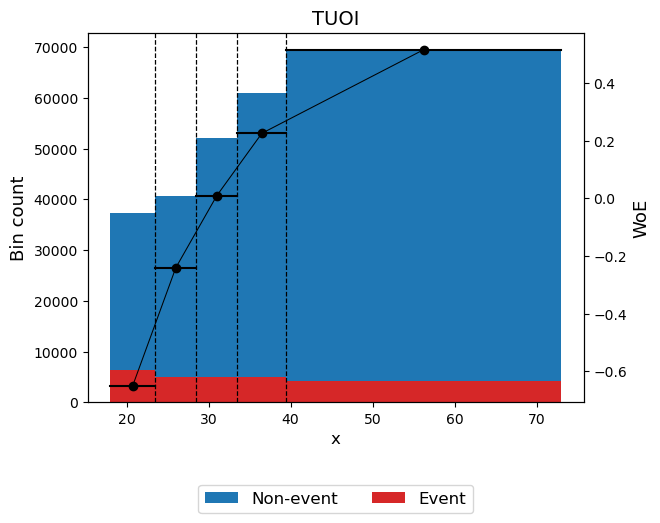


Processing: INCOME
   -> STATUS: OPTIMAL
   -> IV: 0.0670
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 14258922.00)",30664,0.117685,26343,4321,0.140914,-0.40392,0.022550,0.002800
1,"[14258922.00, 19136080.00)",82029,0.314818,72852,9177,0.111875,-0.139906,0.006517,0.000814
2,"[19136080.00, 23816024.00)",71966,0.276197,65370,6596,0.091654,0.081965,0.001795,0.000224
3,"[23816024.00, 27200465.00)",31534,0.121024,29226,2308,0.073191,0.327042,0.011353,0.001413
4,"[27200465.00, inf)",31354,0.120333,29399,1955,0.062352,0.498935,0.024536,0.003036
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,13013,0.049942,11650,1363,0.104741,-0.066018,0.000224,0.000028
Totals,,260560,1.000000,234840,25720,0.098710,,0.066975,0.008314


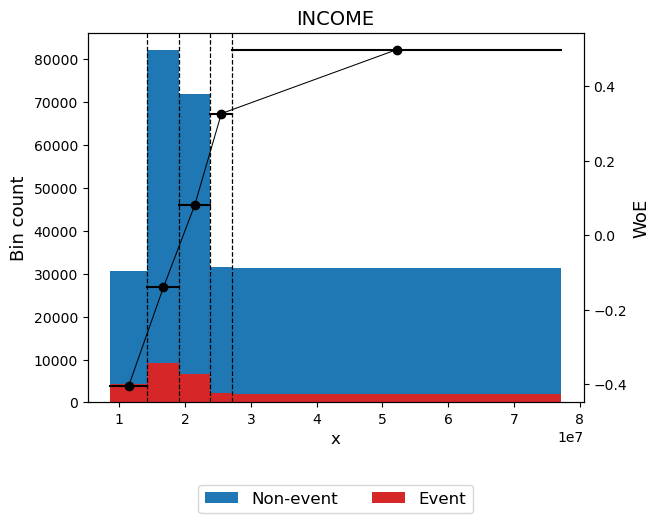


Processing: CBAL
   -> STATUS: OPTIMAL
   -> IV: 0.1481
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 128876972.00)",36112,0.138594,34662,1450,0.040153,0.962445,0.087796,0.010570
1,"[128876972.00, 160544696.00)",29789,0.114327,27866,1923,0.064554,0.461885,0.020273,0.002512
2,"[160544696.00, 197428216.00)",38168,0.146484,34806,3362,0.088084,0.125618,0.002198,0.000275
3,"[197428216.00, 248149400.00)",50010,0.191933,44420,5590,0.111778,-0.138925,0.003916,0.000489
4,"[248149400.00, inf)",106481,0.408662,93086,13395,0.125797,-0.272993,0.033966,0.004233
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,260560,1.000000,234840,25720,0.098710,,0.148150,0.018078


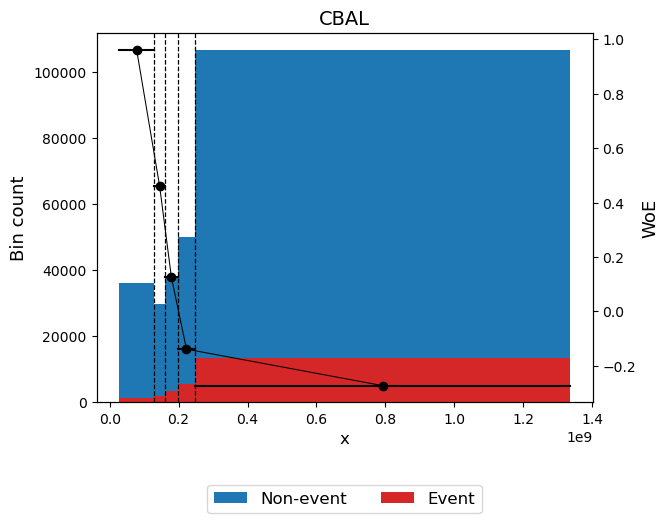


Processing: CBALORG
   -> STATUS: OPTIMAL
   -> IV: 0.1412
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 153976024.00)",46472,0.178354,44398,2074,0.044629,0.85208,0.092381,0.011211
1,"[153976024.00, 191517288.00)",33812,0.129767,31355,2457,0.072667,0.334797,0.012718,0.001582
2,"[191517288.00, 234379376.00)",40386,0.154997,36353,4033,0.099861,-0.012869,0.000026,0.000003
3,"[234379376.00, 286490784.00)",44207,0.169661,39053,5154,0.116588,-0.186489,0.006358,0.000794
4,"[286490784.00, inf)",95683,0.367221,83681,12002,0.125435,-0.269697,0.029750,0.003708
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,260560,1.000000,234840,25720,0.098710,,0.141233,0.017297


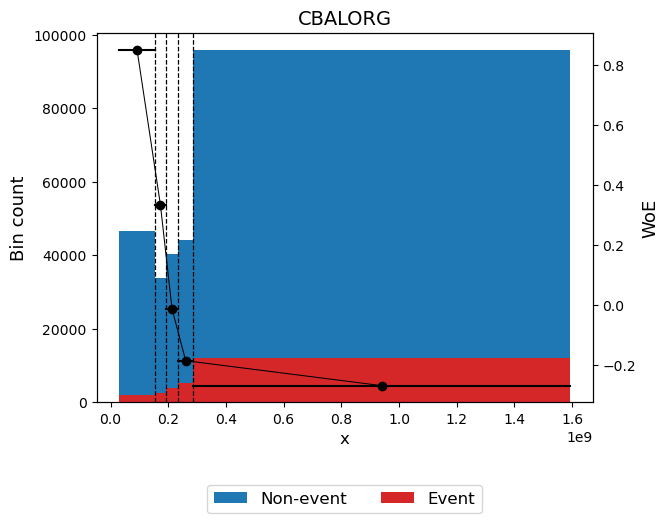


Processing: AFLIMT_MAX
   -> STATUS: OPTIMAL
   -> IV: 0.0600
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 425264944.00)",37990,0.145801,32884,5106,0.134404,-0.349066,0.020419,0.002539
1,"[425264944.00, 523712128.00)",54627,0.209652,48411,6216,0.113790,-0.159035,0.005651,0.000706
2,"[523712128.00, 604796384.00)",46951,0.180193,42134,4817,0.102596,-0.042932,0.000338,0.000042
3,"[604796384.00, 833385824.00)",83898,0.321991,76682,7216,0.086009,0.151731,0.006975,0.000871
4,"[833385824.00, inf)",37094,0.142363,34729,2365,0.063757,0.475162,0.026577,0.003291
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,260560,1.000000,234840,25720,0.098710,,0.059959,0.007450


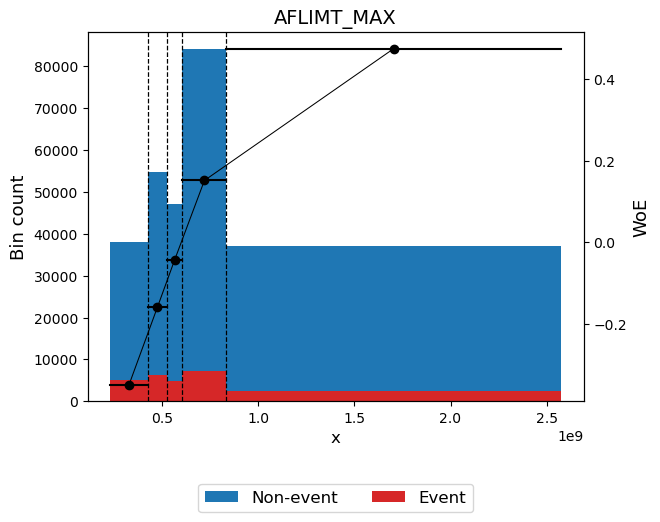


Processing: AFLIMT_MIN
   -> STATUS: OPTIMAL
   -> IV: 0.0600
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 382738448.00)",37990,0.145801,32884,5106,0.134404,-0.349066,0.020419,0.002539
1,"[382738448.00, 471340912.00)",54627,0.209652,48411,6216,0.113790,-0.159035,0.005651,0.000706
2,"[471340912.00, 544316736.00)",46951,0.180193,42134,4817,0.102596,-0.042932,0.000338,0.000042
3,"[544316736.00, 750047232.00)",83898,0.321991,76682,7216,0.086009,0.151731,0.006975,0.000871
4,"[750047232.00, inf)",37094,0.142363,34729,2365,0.063757,0.475162,0.026577,0.003291
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,260560,1.000000,234840,25720,0.098710,,0.059959,0.007450


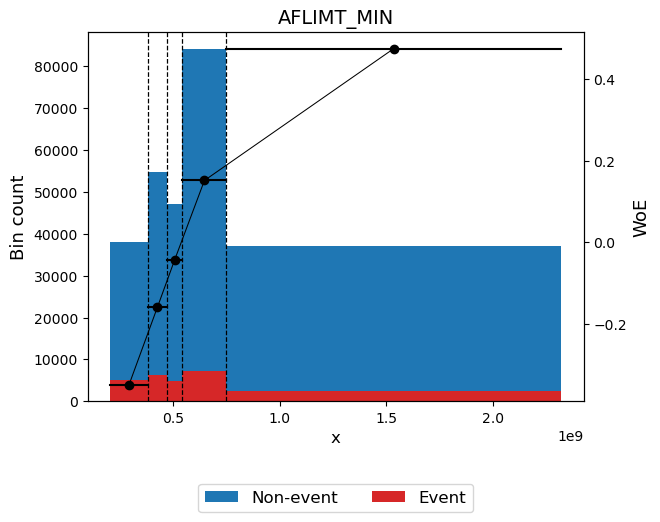


Processing: AFLIMT_AVG
   -> STATUS: OPTIMAL
   -> IV: 0.0600
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 404001696.00)",37990,0.145801,32884,5106,0.134404,-0.349066,0.020419,0.002539
1,"[404001696.00, 497526528.00)",54627,0.209652,48411,6216,0.113790,-0.159035,0.005651,0.000706
2,"[497526528.00, 574556544.00)",46951,0.180193,42134,4817,0.102596,-0.042932,0.000338,0.000042
3,"[574556544.00, 791716544.00)",83898,0.321991,76682,7216,0.086009,0.151731,0.006975,0.000871
4,"[791716544.00, inf)",37094,0.142363,34729,2365,0.063757,0.475162,0.026577,0.003291
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,260560,1.000000,234840,25720,0.098710,,0.059959,0.007450


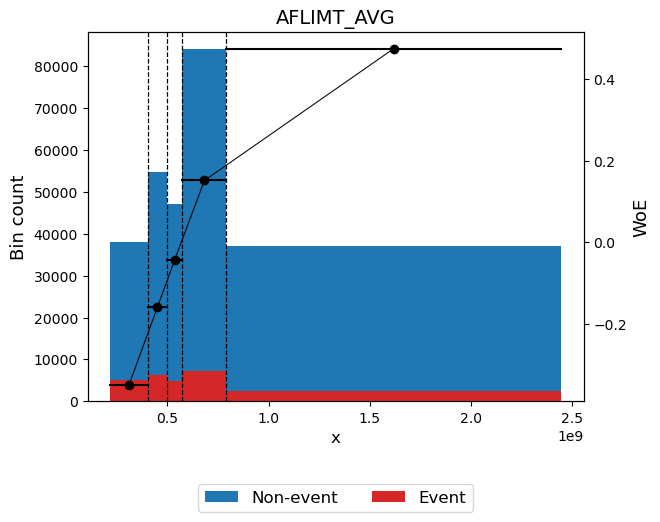


Processing: CBAL_AVG
   -> ERROR: __radd__(): incompatible function arguments. The following argument types are supported:
    1. (self: object, cst: int) -> ortools.sat.python.cp_model_helper.LinearExpr
    2. (self: object, cst: float) -> ortools.sat.python.cp_model_helper.LinearExpr

Invoked with: SumArray(IntAffine(expr=x[6, 0](0..1), coeff=23299, offset=0), IntAffine(expr=x[6, 1](0..1), coeff=14811, offset=0), IntAffine(expr=x[6, 2](0..1), coeff=9693, offset=0), IntAffine(expr=x[6, 3](0..1), coeff=4982, offset=0), IntAffine(expr=x[6, 4](0..1), coeff=2211, offset=0), IntAffine(expr=x[6, 5](0..1), coeff=120, offset=0)), IntConstant(0)

Processing: CBAL_MAX
   -> STATUS: OPTIMAL
   -> IV: 0.1394
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 138772232.00)",27404,0.105173,26378,1026,0.037440,1.035227,0.074984,0.008976
1,"[138772232.00, 179978616.00)",30381,0.116599,28549,1832,0.060301,0.534578,0.026910,0.003324
2,"[179978616.00, 230113344.00)",43005,0.165048,39287,3718,0.086455,0.146072,0.003321,0.000415
3,"[230113344.00, 271270480.00)",34053,0.130692,30393,3660,0.107480,-0.094886,0.001222,0.000153
4,"[271270480.00, inf)",125717,0.482488,110233,15484,0.123166,-0.248846,0.033003,0.004115
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,260560,1.000000,234840,25720,0.098710,,0.139441,0.016982


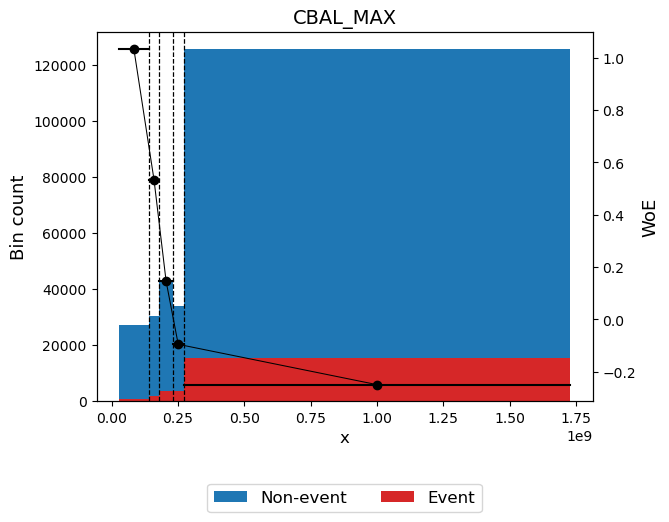


Processing: CBAL_MIN
   -> ERROR: __radd__(): incompatible function arguments. The following argument types are supported:
    1. (self: object, cst: int) -> ortools.sat.python.cp_model_helper.LinearExpr
    2. (self: object, cst: float) -> ortools.sat.python.cp_model_helper.LinearExpr

Invoked with: SumArray(IntAffine(expr=x[6, 0](0..1), coeff=23299, offset=0), IntAffine(expr=x[6, 1](0..1), coeff=14811, offset=0), IntAffine(expr=x[6, 2](0..1), coeff=9693, offset=0), IntAffine(expr=x[6, 3](0..1), coeff=4982, offset=0), IntAffine(expr=x[6, 4](0..1), coeff=2211, offset=0), IntAffine(expr=x[6, 5](0..1), coeff=120, offset=0)), IntConstant(0)

Processing: COLLATERAL_VALUE
   -> STATUS: OPTIMAL
   -> IV: 2.0306
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 1082164.00)",30591,0.117405,25521,5070,0.165735,-0.595475,0.052669,0.006488
1,"[1082164.00, 1017300180.00)",98575,0.378320,85491,13084,0.132731,-0.334615,0.048409,0.006023
2,"[1017300180.00, inf)",75887,0.291246,75864,23,0.000303,5.889568,1.897332,0.109188
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,55507,0.213030,47964,7543,0.135893,-0.361805,0.032212,0.004005
Totals,,260560,1.000000,234840,25720,0.098710,,2.030622,0.125704


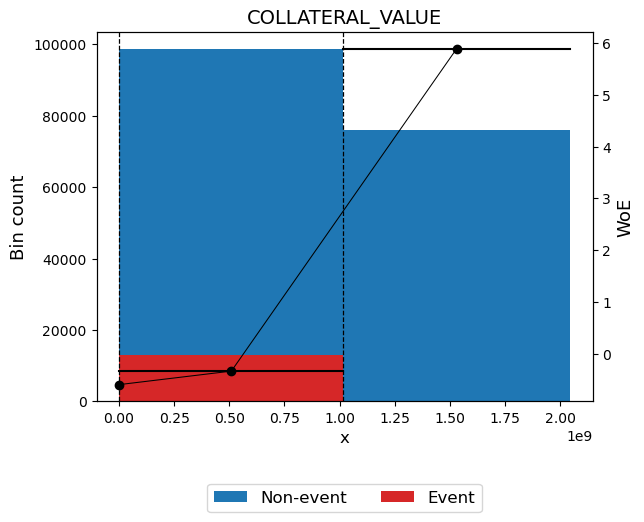


Processing: LTV
   -> STATUS: OPTIMAL
   -> IV: 2.1406
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 13.23)",46557,0.178681,46552,5,0.000107,6.927252,1.371833,0.067998
1,"[13.23, 132.68)",29330,0.112565,29312,18,0.000614,5.183745,0.643391,0.041336
2,"[132.68, inf)",184673,0.708754,158976,25697,0.139149,-0.389257,0.125399,0.015577
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,260560,1.000000,234840,25720,0.098710,,2.140623,0.124910


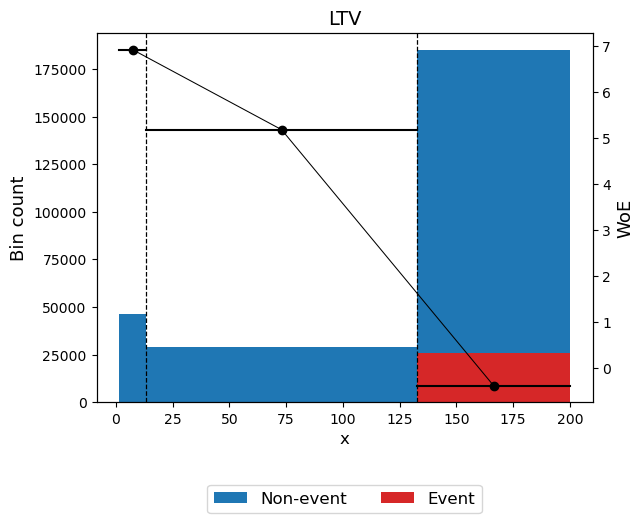


Processing: N_AVG_DEPOSIT_12M
   -> STATUS: OPTIMAL
   -> IV: 0.1930
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 264112.00)",46747,0.179410,38793,7954,0.170150,-0.627071,0.090339,0.011111
1,"[264112.00, 471761.50)",67167,0.257779,59461,7706,0.114729,-0.168314,0.007812,0.000975
2,"[471761.50, 652267.00)",55634,0.213517,50991,4643,0.083456,0.184653,0.006760,0.000844
3,"[652267.00, 768348.50)",32893,0.126240,30654,2239,0.068069,0.405098,0.017613,0.002187
4,"[768348.50, inf)",58119,0.223054,54941,3178,0.054681,0.638372,0.070469,0.008662
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,260560,1.000000,234840,25720,0.098710,,0.192993,0.023779


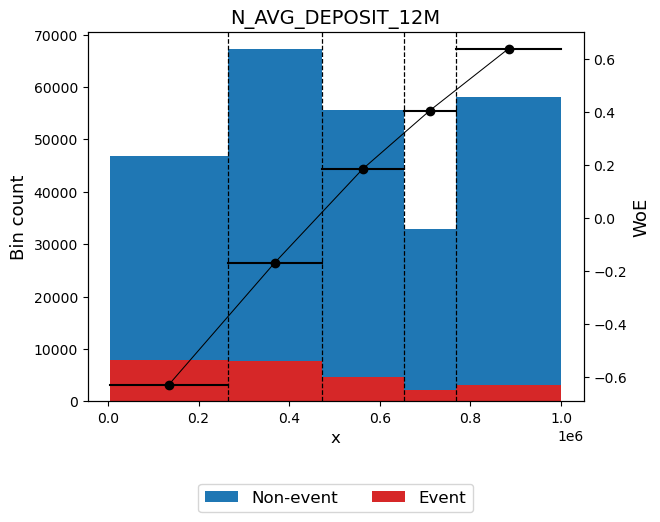


Processing: N_AVG_DEPOSIT_6M
   -> STATUS: OPTIMAL
   -> IV: 0.1930
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 264112.00)",46747,0.179410,38793,7954,0.170150,-0.627071,0.090339,0.011111
1,"[264112.00, 471761.50)",67167,0.257779,59461,7706,0.114729,-0.168314,0.007812,0.000975
2,"[471761.50, 652267.00)",55634,0.213517,50991,4643,0.083456,0.184653,0.006760,0.000844
3,"[652267.00, 768348.50)",32893,0.126240,30654,2239,0.068069,0.405098,0.017613,0.002187
4,"[768348.50, inf)",58119,0.223054,54941,3178,0.054681,0.638372,0.070469,0.008662
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,260560,1.000000,234840,25720,0.098710,,0.192993,0.023779


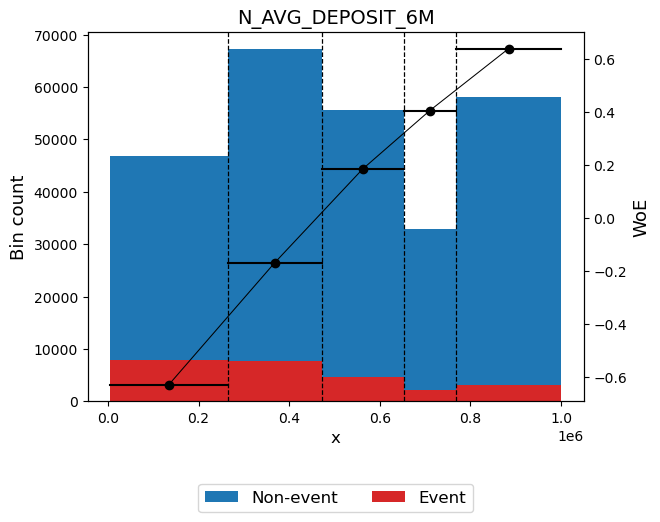


Processing: N_AVG_DD_12M
   -> STATUS: OPTIMAL
   -> IV: 0.1930
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 52822.00)",46747,0.179410,38793,7954,0.170150,-0.627071,0.090339,0.011111
1,"[52822.00, 94353.00)",67168,0.257783,59462,7706,0.114727,-0.168297,0.007811,0.000975
2,"[94353.00, 130454.00)",55634,0.213517,50991,4643,0.083456,0.184653,0.006760,0.000844
3,"[130454.00, 153669.50)",32892,0.126236,30653,2239,0.068071,0.405066,0.017610,0.002186
4,"[153669.50, inf)",58119,0.223054,54941,3178,0.054681,0.638372,0.070469,0.008662
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,260560,1.000000,234840,25720,0.098710,,0.192989,0.023778


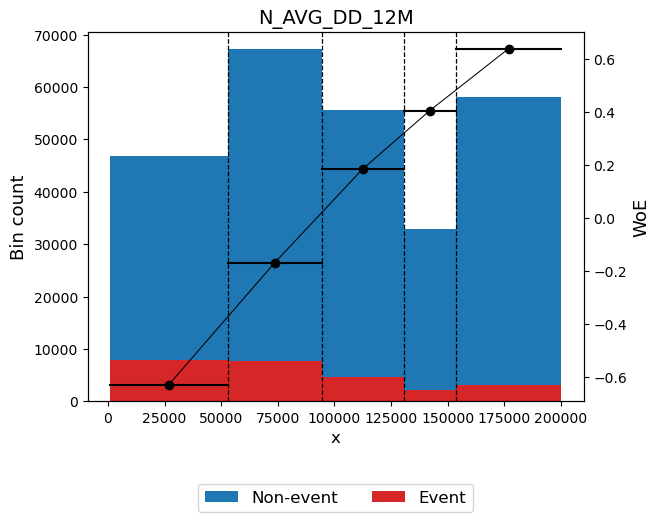


Processing: N_AVG_CD_12M
   -> STATUS: OPTIMAL
   -> IV: 0.1930
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 211290.00)",46747,0.179410,38793,7954,0.170150,-0.627071,0.090339,0.011111
1,"[211290.00, 377409.50)",67167,0.257779,59461,7706,0.114729,-0.168314,0.007812,0.000975
2,"[377409.50, 521814.00)",55634,0.213517,50991,4643,0.083456,0.184653,0.006760,0.000844
3,"[521814.00, 614679.00)",32893,0.126240,30654,2239,0.068069,0.405098,0.017613,0.002187
4,"[614679.00, inf)",58119,0.223054,54941,3178,0.054681,0.638372,0.070469,0.008662
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,260560,1.000000,234840,25720,0.098710,,0.192993,0.023779


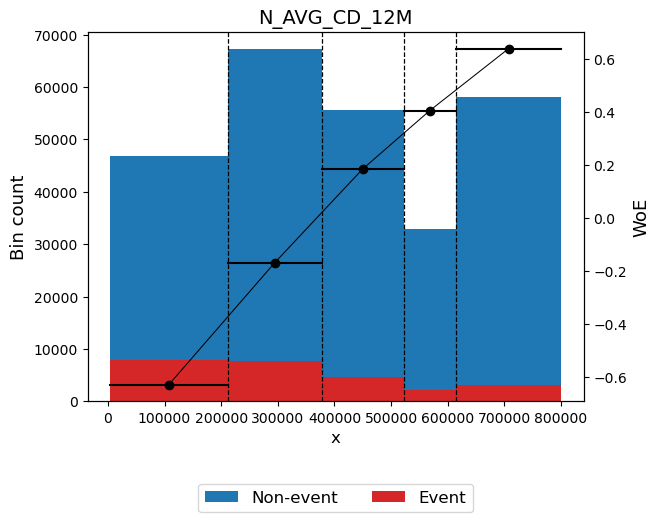


Processing: FLAG_SALARY_ACC
   -> STATUS: OPTIMAL
   -> IV: 0.0306
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",44225,0.169731,38252,5973,0.135059,-0.354689,0.024596,0.003059
1,"[0.50, inf)",216335,0.830269,196588,19747,0.091280,0.086473,0.005997,0.000749
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,260560,1.000000,234840,25720,0.098710,,0.030593,0.003808


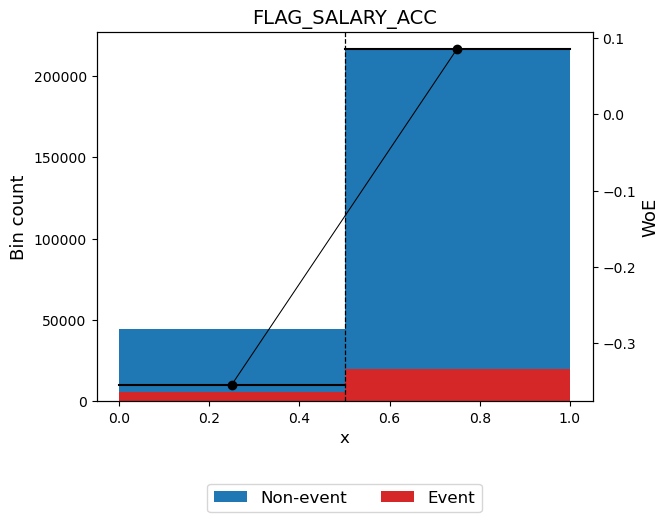


Processing: UTILIZATION_RATE
   -> STATUS: OPTIMAL
   -> IV: 0.4420
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.25)",43396,0.166549,42351,1045,0.024081,1.49034,0.208215,0.023858
1,"[0.25, 0.31)",40344,0.154836,38351,1993,0.049400,0.745504,0.063978,0.007817
2,"[0.31, 0.41)",60245,0.231214,55426,4819,0.079990,0.230847,0.011231,0.001401
3,"[0.41, 0.49)",52715,0.202314,46081,6634,0.125847,-0.273443,0.016874,0.002103
4,"[0.49, inf)",63860,0.245088,52631,11229,0.175838,-0.66683,0.141683,0.017389
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,260560,1.000000,234840,25720,0.098710,,0.441981,0.052567


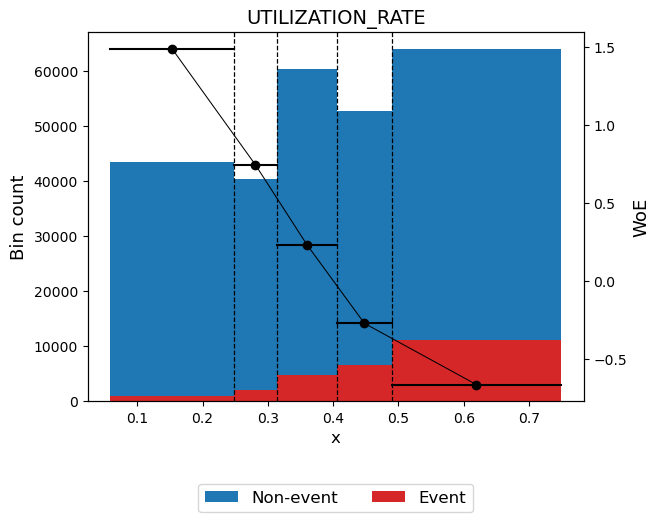


Processing: CNT_CREDIT_CARDS
   -> STATUS: OPTIMAL
   -> IV: 0.0000
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 2.50)",211039,0.809944,190155,20884,0.098958,-0.002779,0.000006,7.829351e-07
1,"[2.50, inf)",49521,0.190056,44685,4836,0.097656,0.011914,0.000027,3.356276e-06
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,260560,1.000000,234840,25720,0.098710,,0.000033,4.139211e-06


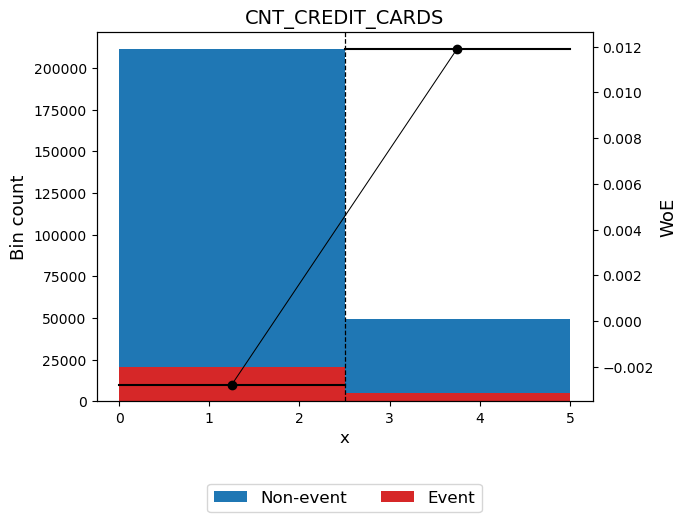


Processing: AMT_CASH_ADVANCE_12M
   -> STATUS: OPTIMAL
   -> IV: 0.0455
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 37604030.00)",221153,0.84876,201226,19927,0.090105,0.100718,0.008269,0.001033
1,"[37604030.00, inf)",39407,0.15124,33614,5793,0.147004,-0.453343,0.037218,0.004613
2,Special,0,0.00000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.00000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,260560,1.00000,234840,25720,0.098710,,0.045487,0.005646


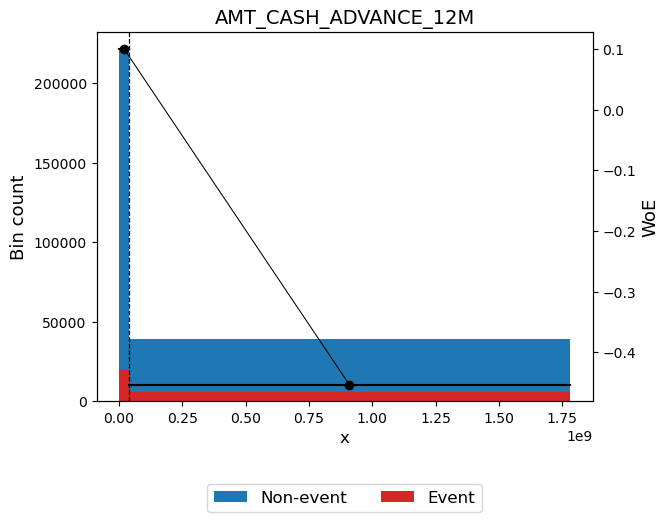


Processing: FLAG_CASH_ADVANCE
   -> STATUS: OPTIMAL
   -> IV: 0.0455
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",221117,0.848622,201194,19923,0.090102,0.100759,0.008274,0.001034
1,"[0.50, inf)",39443,0.151378,33646,5797,0.146972,-0.453082,0.037206,0.004611
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,260560,1.000000,234840,25720,0.098710,,0.045480,0.005645


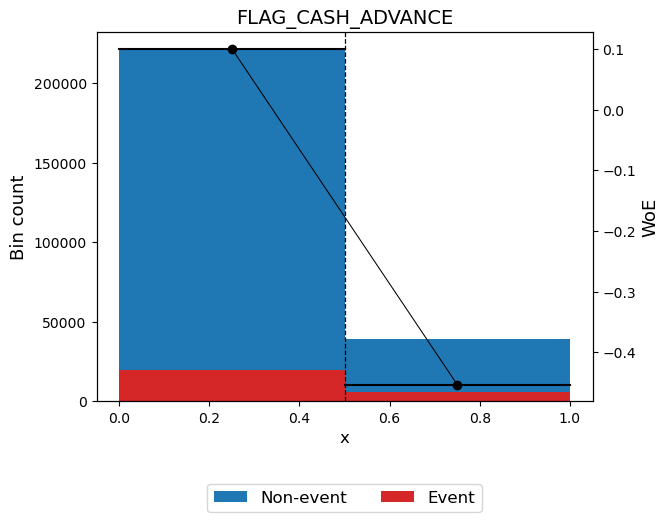


Processing: PCT_PAYMENT_TO_BALANCE
   -> STATUS: OPTIMAL
   -> IV: 0.0549
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.77)",45957,0.176378,39963,5994,0.130426,-0.31444,0.019771,0.002461
1,"[0.77, 1.06)",74250,0.284963,66100,8150,0.109764,-0.118485,0.004195,0.000524
2,"[1.06, 1.25)",58397,0.224121,52918,5479,0.093823,0.056185,0.000692,0.000086
3,"[1.25, 1.48)",49081,0.188367,45119,3962,0.080724,0.220919,0.008413,0.001050
4,"[1.48, inf)",32875,0.126171,30740,2135,0.064943,0.455463,0.021811,0.002703
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,260560,1.000000,234840,25720,0.098710,,0.054882,0.006824


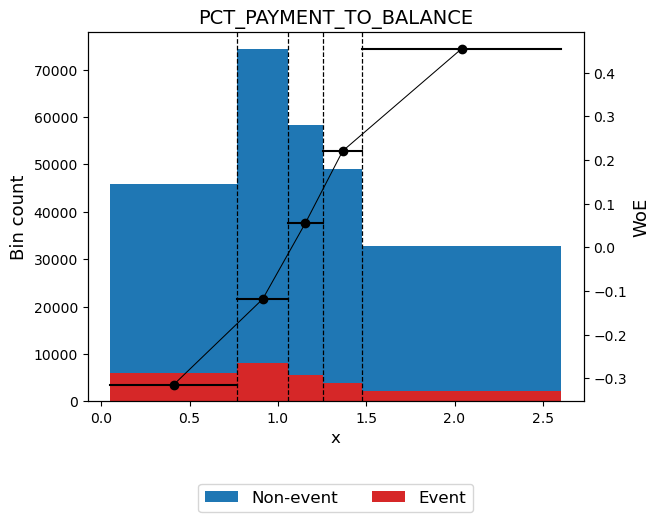


Processing: CNT_MIN_PAY_6M
   -> STATUS: OPTIMAL
   -> IV: 0.1167
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",178740,0.685984,164860,13880,0.077655,0.263012,0.042701,0.005322
1,"[0.50, 1.50)",33627,0.129057,29226,4401,0.130877,-0.318409,0.014857,0.001849
2,"[1.50, inf)",48193,0.184959,40754,7439,0.154359,-0.510818,0.059097,0.007308
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,260560,1.000000,234840,25720,0.098710,,0.116655,0.014479


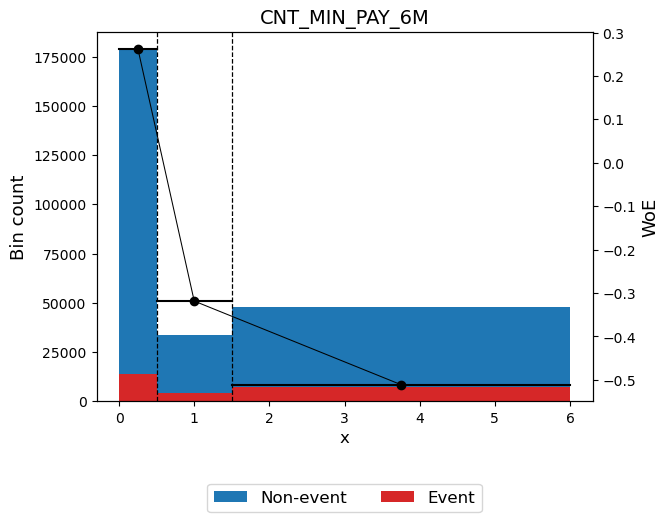


Processing: AVG_DAYS_PAST_DUE
   -> STATUS: OPTIMAL
   -> IV: 0.1077
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",180117,0.691269,165968,14149,0.078554,0.250516,0.039234,0.004891
1,"[0.50, 3.50)",44991,0.172670,38825,6166,0.137050,-0.371621,0.027652,0.003437
2,"[3.50, inf)",35452,0.136061,30047,5405,0.152460,-0.496197,0.040788,0.005047
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,260560,1.000000,234840,25720,0.098710,,0.107674,0.013375


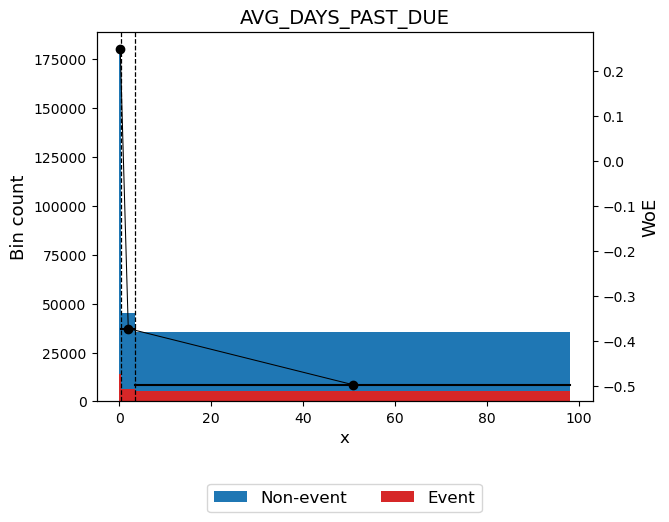


Processing: DTI_RATIO
   -> STATUS: OPTIMAL
   -> IV: 0.4972
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.60)",37682,0.144619,36890,792,0.021018,1.629499,0.205794,0.023209
1,"[0.60, 0.76)",38989,0.149635,37295,1694,0.043448,0.880131,0.081806,0.009908
2,"[0.76, 0.91)",40913,0.157019,38264,2649,0.064747,0.458692,0.027495,0.003407
3,"[0.91, 1.22)",79089,0.303535,70398,8691,0.109889,-0.119759,0.004567,0.000571
4,"[1.22, inf)",63887,0.245191,51993,11894,0.186172,-0.736561,0.177544,0.021705
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,260560,1.000000,234840,25720,0.098710,,0.497205,0.058800


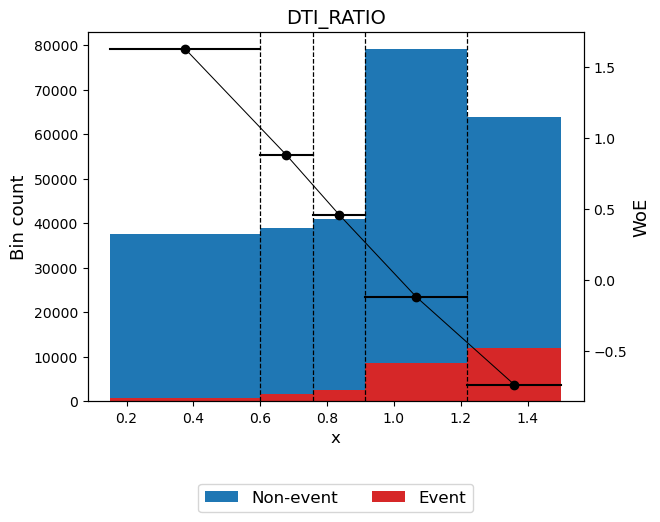


Processing: PTI_RATIO
   -> STATUS: OPTIMAL
   -> IV: 0.4618
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.36)",32717,0.125564,32093,624,0.019073,1.728607,0.194292,0.021653
1,"[0.36, 0.49)",46261,0.177545,44282,1979,0.042779,0.896351,0.100049,0.012104
2,"[0.49, 0.60)",41069,0.157618,38192,2877,0.070053,0.374242,0.019001,0.002361
3,"[0.60, 0.70)",38168,0.146484,34268,3900,0.102180,-0.0384,0.000219,0.000027
4,"[0.70, inf)",102345,0.392789,86005,16340,0.159656,-0.550846,0.148219,0.018297
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,260560,1.000000,234840,25720,0.098710,,0.461780,0.054442


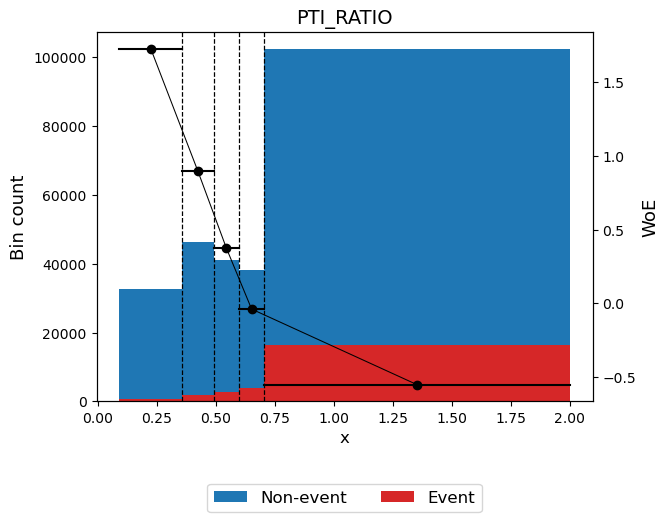


Processing: MOB
   -> ERROR: __radd__(): incompatible function arguments. The following argument types are supported:
    1. (self: object, cst: int) -> ortools.sat.python.cp_model_helper.LinearExpr
    2. (self: object, cst: float) -> ortools.sat.python.cp_model_helper.LinearExpr

Invoked with: SumArray(IntAffine(expr=x[10, 0](0..1), coeff=-8, offset=0), IntAffine(expr=x[10, 1](0..1), coeff=-1, offset=0), IntAffine(expr=x[10, 2](0..1), coeff=10, offset=0), IntAffine(expr=x[10, 3](0..1), coeff=-24, offset=0), IntAffine(expr=x[10, 4](0..1), coeff=23, offset=0), x[10, 5](0..1), IntAffine(expr=x[10, 6](0..1), coeff=-70, offset=0), IntAffine(expr=x[10, 7](0..1), coeff=37, offset=0), IntAffine(expr=x[10, 8](0..1), coeff=-130, offset=0), IntAffine(expr=x[10, 9](0..1), coeff=165, offset=0)), IntConstant(0)

Processing: CNT_OTHER_PRODUCTS
   -> ERROR: __radd__(): incompatible function arguments. The following argument types are supported:
    1. (self: object, cst: int) -> ortools.sat.python.

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 76353172.00)",101055,0.387838,92557,8498,0.084093,0.176358,0.011238,1.402955e-03
1,"[76353172.00, 103332800.00)",32714,0.125553,29702,3012,0.092071,0.076975,0.000721,9.013699e-05
2,"[103332800.00, 136202024.00)",33817,0.129786,30470,3347,0.098974,-0.002957,0.000001,1.420566e-07
3,"[136202024.00, 170411672.00)",27519,0.105615,24511,3008,0.109306,-0.113789,0.001431,1.788167e-04
4,"[170411672.00, inf)",65455,0.251209,57600,7855,0.120006,-0.219263,0.013185,1.644771e-03
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,260560,1.000000,234840,25720,0.098710,,0.026576,3.316821e-03


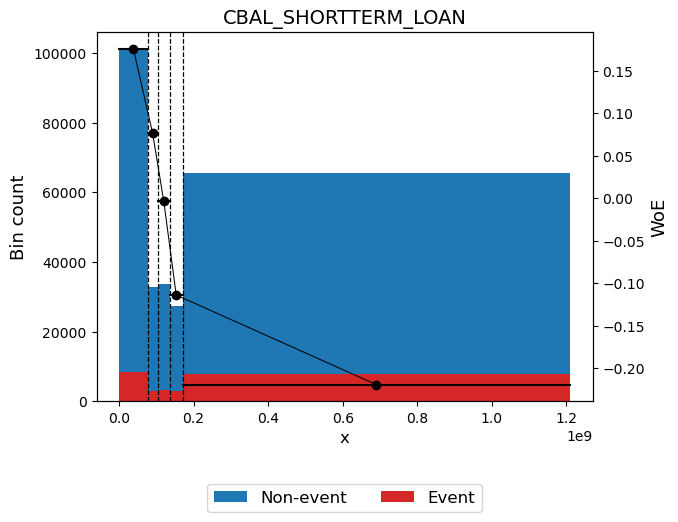


Processing: CBAL_LONGTERM_LOAN
   -> ERROR: __radd__(): incompatible function arguments. The following argument types are supported:
    1. (self: object, cst: int) -> ortools.sat.python.cp_model_helper.LinearExpr
    2. (self: object, cst: float) -> ortools.sat.python.cp_model_helper.LinearExpr

Invoked with: SumArray(IntAffine(expr=x[10, 0](0..1), coeff=2189, offset=0), IntAffine(expr=x[10, 1](0..1), coeff=2483, offset=0), IntAffine(expr=x[10, 2](0..1), coeff=1182, offset=0), IntAffine(expr=x[10, 3](0..1), coeff=1680, offset=0), IntAffine(expr=x[10, 4](0..1), coeff=921, offset=0), IntAffine(expr=x[10, 5](0..1), coeff=1022, offset=0), IntAffine(expr=x[10, 6](0..1), coeff=567, offset=0), IntAffine(expr=x[10, 7](0..1), coeff=224, offset=0), IntAffine(expr=x[10, 8](0..1), coeff=-7, offset=0), IntAffine(expr=x[10, 9](0..1), coeff=20, offset=0)), IntConstant(0)

Processing: CNT_DPD_30PLUS_6M
   -> STATUS: OPTIMAL
   -> IV: 0.0454
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",224728,0.862481,204382,20346,0.090536,0.095471,0.007566,0.000945
1,"[0.50, inf)",35832,0.137519,30458,5374,0.149978,-0.476859,0.037789,0.004679
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,260560,1.000000,234840,25720,0.098710,,0.045355,0.005625


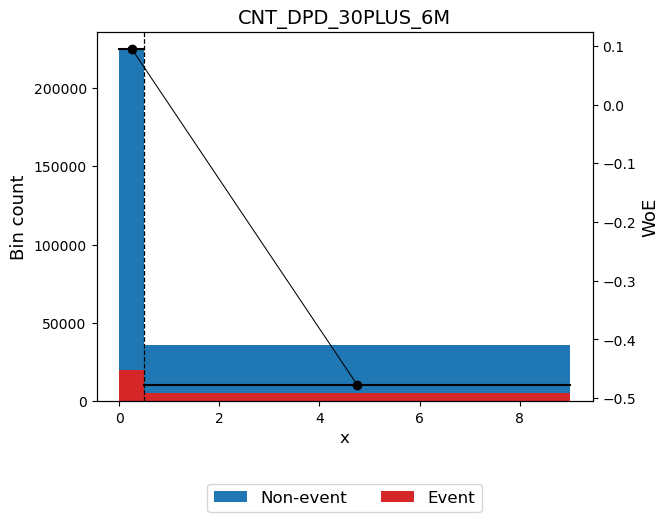


Processing: OCCUPATION_TYPE
   -> STATUS: OPTIMAL
   -> IV: 0.0003
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[4],26108,0.100200,23586,2522,0.096599,0.023966,0.000057,0.000007
1,[1],103927,0.398860,93791,10136,0.097530,0.01334,0.000071,0.000009
2,[3],52312,0.200768,47107,5205,0.099499,-0.008834,0.000016,0.000002
3,[2],78213,0.300173,70356,7857,0.100456,-0.019472,0.000115,0.000014
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,260560,1.000000,234840,25720,0.098710,,0.000258,0.000032


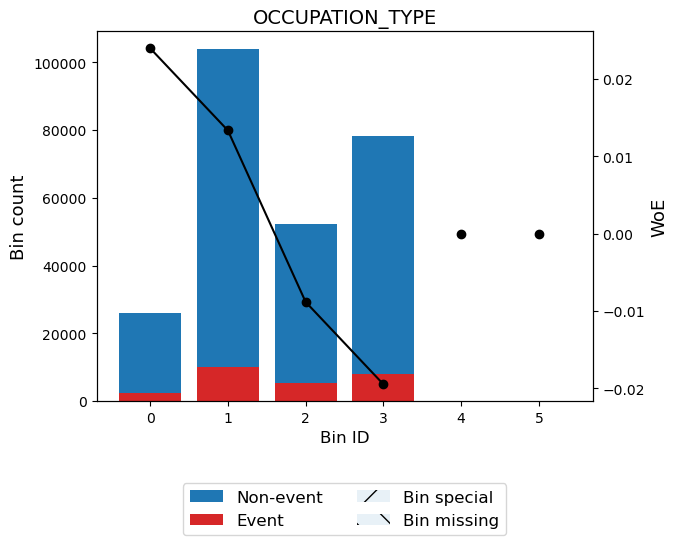


Processing: DURATION_MAX
   -> STATUS: OPTIMAL
   -> IV: 0.0000
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 150.00)",210970,0.809679,190205,20765,0.098426,0.003198,0.000008,0.000001
1,"[150.00, inf)",49590,0.190321,44635,4955,0.099919,-0.013514,0.000035,0.000004
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,260560,1.000000,234840,25720,0.098710,,0.000043,0.000005


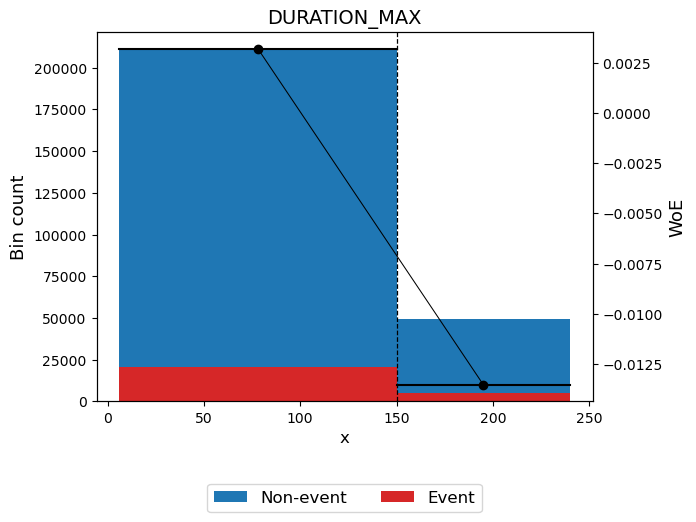


Processing: REMAINING_DURATION_MAX
   -> ERROR: __radd__(): incompatible function arguments. The following argument types are supported:
    1. (self: object, cst: int) -> ortools.sat.python.cp_model_helper.LinearExpr
    2. (self: object, cst: float) -> ortools.sat.python.cp_model_helper.LinearExpr

Invoked with: SumArray(IntAffine(expr=x[2, 0](0..1), coeff=199, offset=0), IntAffine(expr=x[2, 1](0..1), coeff=42, offset=0)), IntConstant(0)

Processing: TIME_TO_OP_MAX
   -> STATUS: OPTIMAL
   -> IV: 0.0000
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 55.50)",198102,0.760293,178482,19620,0.099040,-0.003697,0.000010,0.000001
1,"[55.50, inf)",62458,0.239707,56358,6100,0.097666,0.0118,0.000033,0.000004
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,260560,1.000000,234840,25720,0.098710,,0.000044,0.000005


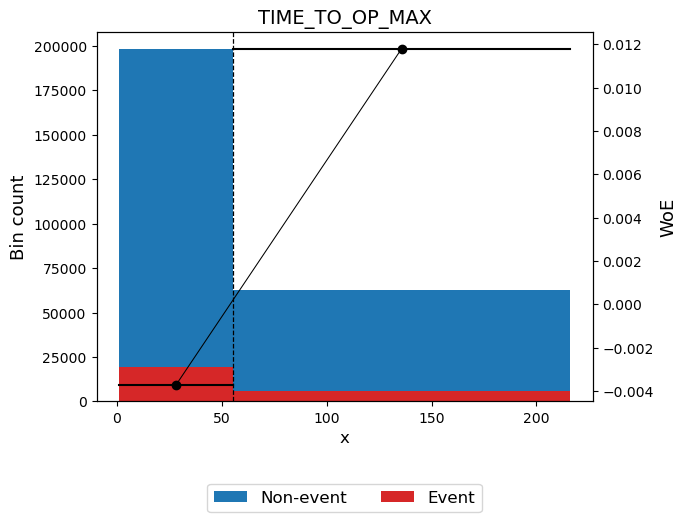


Processing: RATE_AVG
   -> STATUS: OPTIMAL
   -> IV: 0.1304
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 7.15)",49311,0.189250,46688,2623,0.053193,0.667533,0.064634,7.932479e-03
1,"[7.15, 8.47)",53707,0.206121,49478,4229,0.078742,0.247927,0.011470,1.430087e-03
2,"[8.47, 9.62)",52898,0.203017,47704,5194,0.098189,0.005876,0.000007,8.740219e-07
3,"[9.62, 11.64)",70863,0.271964,62378,8485,0.119738,-0.216723,0.013931,1.737961e-03
4,"[11.64, inf)",33781,0.129648,28592,5189,0.153607,-0.50505,0.040403,4.997408e-03
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,260560,1.000000,234840,25720,0.098710,,0.130445,1.609881e-02


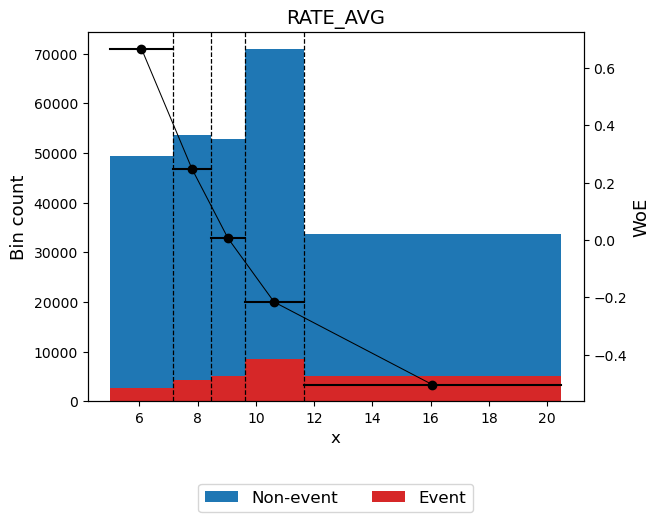


Processing: PURCOD_MAX
   -> STATUS: OPTIMAL
   -> IV: 0.0003
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[2, 6, 9]",182185,0.699206,164368,17817,0.097796,0.010319,0.000074,0.000009
1,[1],52240,0.200491,47014,5226,0.100038,-0.014836,0.000044,0.000006
2,[3],26135,0.100303,23458,2677,0.102430,-0.041121,0.000172,0.000022
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,260560,1.000000,234840,25720,0.098710,,0.000291,0.000036


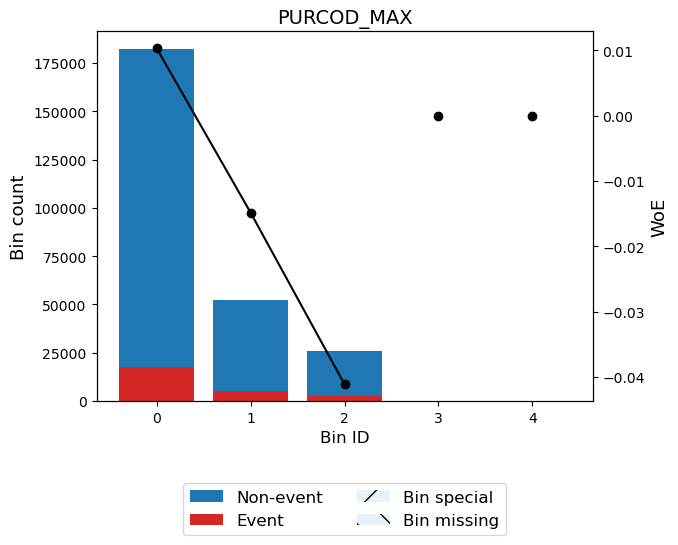


Processing: PURCOD_MIN
   -> STATUS: OPTIMAL
   -> IV: 0.0003
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[2, 6, 9]",182185,0.699206,164368,17817,0.097796,0.010319,0.000074,0.000009
1,[1],52240,0.200491,47014,5226,0.100038,-0.014836,0.000044,0.000006
2,[3],26135,0.100303,23458,2677,0.102430,-0.041121,0.000172,0.000022
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,260560,1.000000,234840,25720,0.098710,,0.000291,0.000036


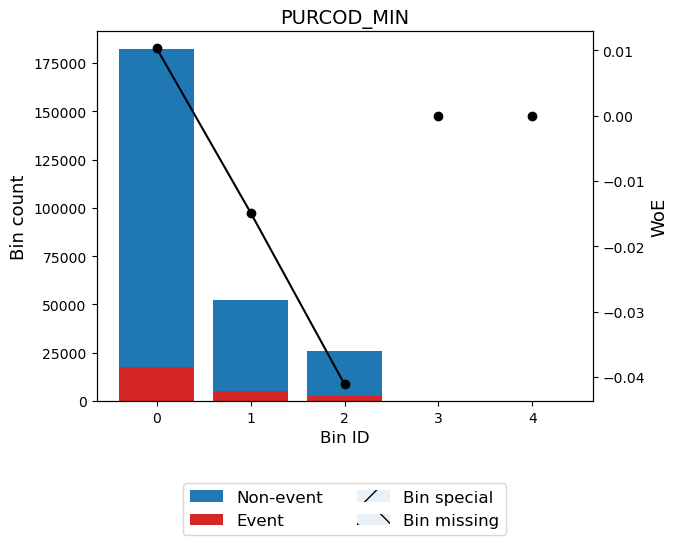


Processing: MAX_DPD_12M
   -> STATUS: OPTIMAL
   -> IV: 2.3163
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 3.50)",43323,0.166269,43261,62,0.001431,4.336237,0.788346,0.058240
1,"[3.50, 11.50)",57558,0.220901,57017,541,0.009399,2.44605,0.542428,0.054749
2,"[11.50, 30.50)",74095,0.284368,71549,2546,0.034361,1.124223,0.231233,0.027472
3,"[30.50, 48.50)",38392,0.147344,30219,8173,0.212883,-0.904001,0.170937,0.020668
4,"[48.50, inf)",47192,0.181118,32794,14398,0.305094,-1.388479,0.583375,0.067576
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,260560,1.000000,234840,25720,0.098710,,2.316318,0.228706


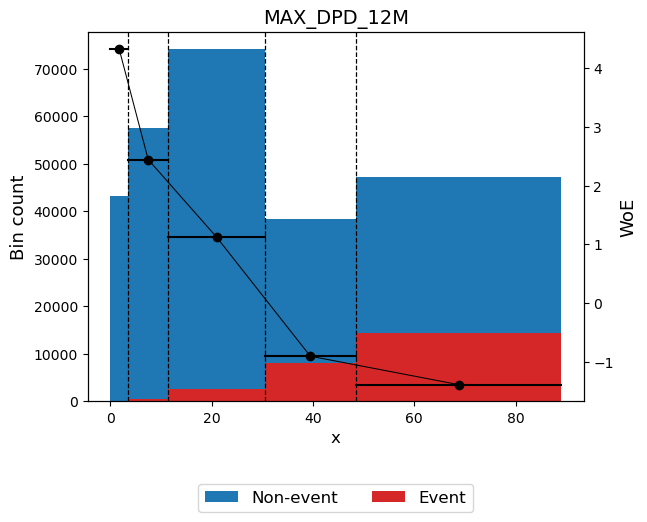


Processing: MAX_DPD_12M_OBS
   -> STATUS: OPTIMAL
   -> IV: 2.3163
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 3.50)",43323,0.166269,43261,62,0.001431,4.336237,0.788346,0.058240
1,"[3.50, 11.50)",57558,0.220901,57017,541,0.009399,2.44605,0.542428,0.054749
2,"[11.50, 30.50)",74095,0.284368,71549,2546,0.034361,1.124223,0.231233,0.027472
3,"[30.50, 48.50)",38392,0.147344,30219,8173,0.212883,-0.904001,0.170937,0.020668
4,"[48.50, inf)",47192,0.181118,32794,14398,0.305094,-1.388479,0.583375,0.067576
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,260560,1.000000,234840,25720,0.098710,,2.316318,0.228706


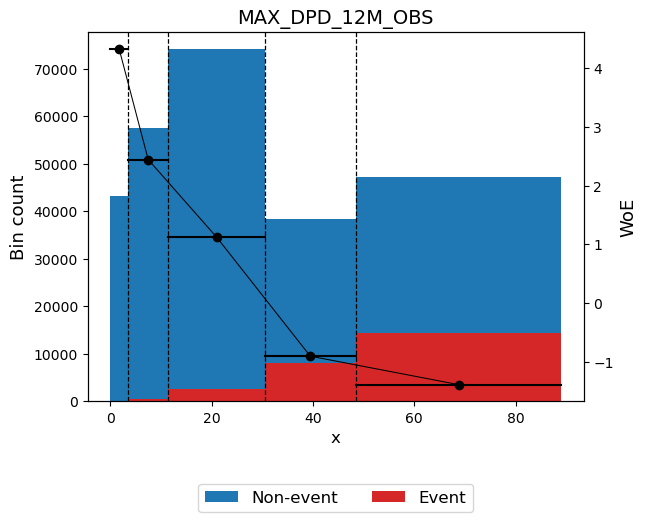


Processing: AVG_OD_DPD_12M
   -> STATUS: OPTIMAL
   -> IV: 1.8077
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",47439,0.182066,47336,103,0.002171,3.918662,0.774180,0.061377
1,"[0.50, 2.50)",52682,0.202188,52022,660,0.012528,2.155547,0.422186,0.044464
2,"[2.50, 6.50)",61019,0.234184,57560,3459,0.056687,0.600213,0.066393,0.008177
3,"[6.50, 11.50)",41958,0.161030,35885,6073,0.144740,-0.435169,0.036255,0.004497
4,"[11.50, inf)",57462,0.220533,42037,15425,0.268438,-1.209075,0.508688,0.059976
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,260560,1.000000,234840,25720,0.098710,,1.807703,0.178490


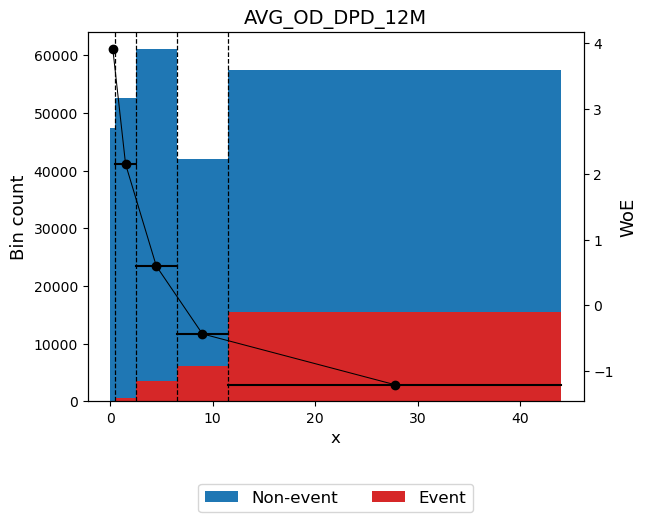


Processing: SUM_ALL_OD_12M
   -> STATUS: OPTIMAL
   -> IV: 2.0284
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 4.50)",35334,0.135608,35295,39,0.001104,4.596299,0.683826,0.048367
1,"[4.50, 17.50)",54490,0.209126,54034,456,0.008369,2.56324,0.544328,0.053967
2,"[17.50, 36.50)",49562,0.190213,48205,1357,0.027380,1.358551,0.207188,0.024074
3,"[36.50, 63.50)",43431,0.166683,39333,4098,0.094357,0.049929,0.000407,0.000051
4,"[63.50, inf)",77743,0.298369,57973,19770,0.254299,-1.135824,0.592674,0.070342
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,260560,1.000000,234840,25720,0.098710,,2.028423,0.196801


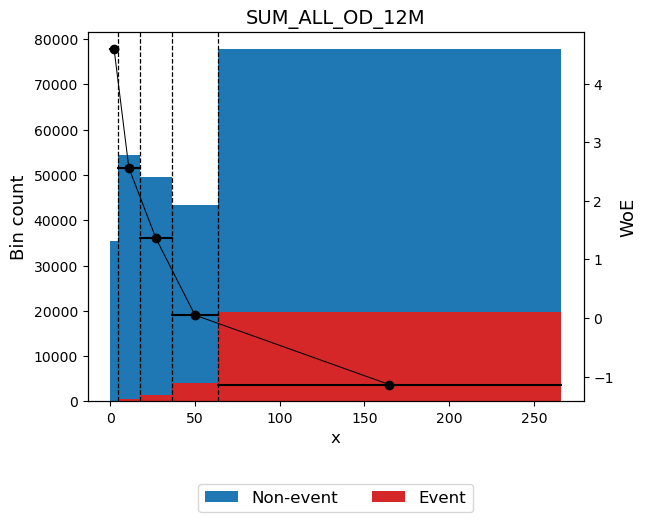


Processing: N_AVG_OVERDUE_CBAL_12M
   -> STATUS: OPTIMAL
   -> IV: 0.2719
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 49638304.00)",26206,0.100576,25774,432,0.016485,1.87706,0.174482,0.019084
1,"[49638304.00, 74877136.00)",38419,0.147448,36189,2230,0.058044,0.575118,0.038762,0.004780
2,"[74877136.00, 92136788.00)",33453,0.128389,30723,2730,0.081607,0.209074,0.005160,0.000644
3,"[92136788.00, 124346284.00)",61192,0.234848,54197,6995,0.114312,-0.164206,0.006763,0.000844
4,"[124346284.00, inf)",101290,0.388740,87957,13333,0.131632,-0.32503,0.046756,0.005819
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,260560,1.000000,234840,25720,0.098710,,0.271923,0.031171


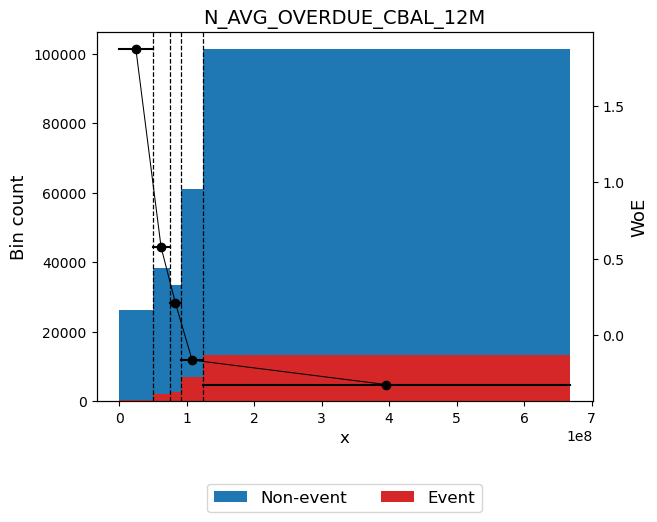


Processing: CBAL_TO_INC_12MON
   -> STATUS: OPTIMAL
   -> IV: 0.4972
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 7.17)",37682,0.144619,36890,792,0.021018,1.629499,0.205794,0.023209
1,"[7.17, 9.10)",38989,0.149635,37295,1694,0.043448,0.880131,0.081806,0.009908
2,"[9.10, 10.97)",40913,0.157019,38264,2649,0.064747,0.458692,0.027495,0.003407
3,"[10.97, 14.64)",79089,0.303535,70398,8691,0.109889,-0.119759,0.004567,0.000571
4,"[14.64, inf)",63887,0.245191,51993,11894,0.186172,-0.736561,0.177544,0.021705
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,260560,1.000000,234840,25720,0.098710,,0.497205,0.058800


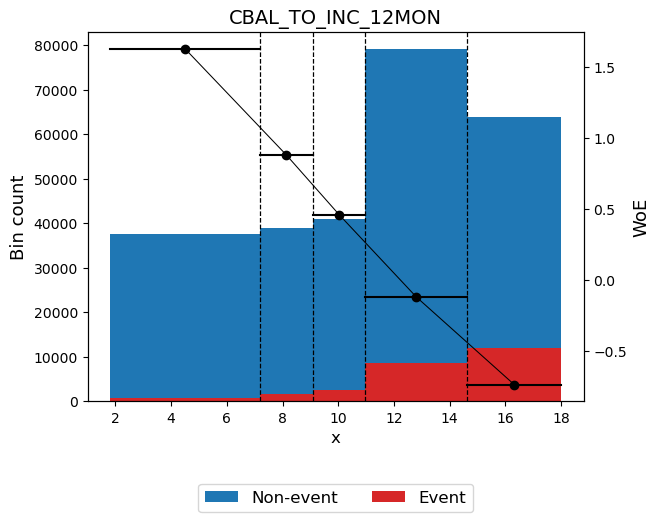


Processing: REAL_GDP_GROWTH_12M
   -> STATUS: OPTIMAL
   -> IV: 0.0052
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 4.97)",128106,0.491656,114629,13477,0.105202,-0.070919,0.002544,0.000318
1,"[4.97, 7.05)",64573,0.247824,58594,5979,0.092593,0.070743,0.001206,0.000151
2,"[7.05, inf)",67881,0.260520,61617,6264,0.092279,0.074483,0.001403,0.000175
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,260560,1.000000,234840,25720,0.098710,,0.005152,0.000644


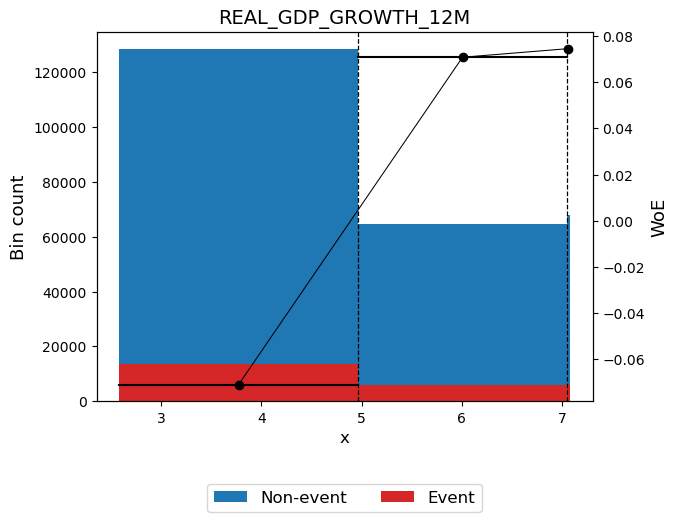

In [4]:
forced_cat_cols = [
    "C_GIOITINH", "TTHONNHAN", "PURCOD_MAX", "PURCOD_MIN",
    "OCCUPATION_TYPE", "TRINHDO", "MAX_NHOMNOCIC"
]

exclude_cols = [
    "SEGMENT", "SAMPLE_TYPE", "SOCIF", "year",
    "bad_current", "CASE_ID", target_col,
    "SNAPSHOT_DATE", "CURE_DATE"
]


candidates = [c for c in train.columns if c not in exclude_cols]

# --- BƯỚC LỌC THÔ (PRE-FILTER) ---
clean_candidates = []
for c in candidates:
    # 1. Loại biến chỉ có 1 giá trị duy nhất (Constant)
    if train[c].nunique() <= 1:
        print(f"Skip {c}: Biến hằng số (1 unique value)")
        continue
        
    # 2. Loại biến 100% Missing
    if train[c].isnull().all():
        print(f"Skip {c}: Biến 100% Null")
        continue
        
    clean_candidates.append(c)

# Cập nhật lại list cần chạy
candidates = clean_candidates

binning_results = {}

for feature in candidates:
    print(f"\nProcessing: {feature}")

    try:
        # Xác định loại biến
        is_categorical = feature in forced_cat_cols or \
                         (not pd.api.types.is_numeric_dtype(train[feature]))

        x_clean = train[feature].values 
        dtype_input = "numerical"
        
        if is_categorical:
            dtype_input = "categorical"
            x_clean = train[feature].astype(str).values

        optb = OptimalBinning(
            name=feature,
            dtype=dtype_input,
            solver="cp",
            monotonic_trend='auto_asc_desc',
            max_n_bins=5,
            prebinning_method='cart',
            divergence='iv',
            min_n_bins=2,
            min_bin_size=0.1
        )

        optb.fit(x_clean, train[target_col])

        print(f"   -> STATUS: {optb.status}")

        if optb.status in ["OPTIMAL", "FEASIBLE"]:
            optb.binning_table.build()
            # Lưu lại kết quả
            binning_results[feature] = optb
 
            # IV
            print(f"   -> IV: {optb.binning_table.iv:.4f}")

            # Hiển thị bảng
            print("   -> Chi tiết các Bin:")
            display(optb.binning_table.build())

            # Vẽ WOE
            try:
                # 1. Xóa plot cũ
                plt.close('all')
                
                # 2. Xử lý tiêu đề cho gọn
                plot_title = f"Var: {feature} | IV: {optb.binning_table.iv:.4f}"
                
                # 3. Vẽ hình dựa trên loại biến
                if dtype_input == "numerical":
                    # Biến số: Vẽ style="actual" để thấy xu hướng tăng/giảm rõ ràng
                    optb.binning_table.plot(metric="woe", style="actual", add_special=True)
                else:
                    # Biến category: KHÔNG dùng style="actual", chỉ vẽ cột mặc định
                    optb.binning_table.plot(metric="woe", add_special=True)
                
                # 4. Hiển thị
                plt.show()
                plt.close() # Đóng ngay

            except Exception as e_plot:
                print(f"   -> Lỗi vẽ hình: {e_plot}")

        else:
            print("   -> Skip: Không tạo được bin tối ưu")

    except Exception as e:
        print(f"   -> ERROR: {e}")

TỔNG HỢP KẾT QUẢ VÀ KIỂM TRA CHẤT LƯỢNG BIẾN

In [5]:
summary_data = []

for feature, optb in binning_results.items():
    # 1. Lấy bảng binning chi tiết
    bt = optb.binning_table.build()
    
    # --- SỬA LỖI TẠI ĐÂY ---
    # Chuyển cột Bin sang string trước khi so sánh để tránh lỗi với biến Category (list)
    bt_clean = bt[bt['Bin'].astype(str) != 'Totals']
    
    # Chỉ xét các bin có dữ liệu (Count > 0)
    valid_bins = bt_clean[bt_clean['Count'] > 0]
    
    if valid_bins.empty:
        continue

    # 2. Tính toán các chỉ số
    iv_value = optb.binning_table.iv
    min_bin_pct = valid_bins['Count (%)'].min() # Tỷ lệ % của bin nhỏ nhất
    max_bin_pct = valid_bins['Count (%)'].max() # Tỷ lệ % của bin lớn nhất
    n_bins = len(valid_bins)

    # 3. Xác định xu hướng (Trend) với PD (Event Rate)
    trend_observed = "N/A (Categorical)"
    
    if optb.dtype == "numerical":
        # Lấy các bin số thực (loại bỏ Special/Missing)
        # Convert sang str để so sánh an toàn
        mask_special = valid_bins['Bin'].astype(str).isin(['Special', 'Missing'])
        numeric_bins = valid_bins[~mask_special]
        
        if len(numeric_bins) >= 2:
            first_er = numeric_bins.iloc[0]['Event rate']
            last_er = numeric_bins.iloc[-1]['Event rate']
            
            if last_er > first_er:
                trend_observed = "Tăng (Thuận)"
            elif last_er < first_er:
                trend_observed = "Giảm (Nghịch)"
            else:
                trend_observed = "Không rõ (Flat)"

    # 4. Gắn cờ cảnh báo (Flag Issues)
    issues = []
    if iv_value < 0.02: 
        issues.append("Weak IV")
    if min_bin_pct < 0.05: 
        issues.append("Small Bin (<5%)")
    if optb.status != "OPTIMAL":
        issues.append(f"Status: {optb.status}")
    if n_bins < 2:
        issues.append("Single Bin")

    # 5. Đưa vào danh sách tổng hợp
    summary_data.append({
        "Variable": feature,
        "IV": iv_value,
        "Trend_PD": trend_observed,
        "Min_Bin_Pct": min_bin_pct,
        "Max_Bin_Pct": max_bin_pct,
        "Num_Bins": n_bins,
        "Quality_Check": ", ".join(issues) if issues else "PASS"
    })

# --- HIỂN THỊ KẾT QUẢ ---
if summary_data:
    df_summary = pd.DataFrame(summary_data)
    
    # Sắp xếp theo IV giảm dần
    df_summary = df_summary.sort_values("IV", ascending=False).reset_index(drop=True)
    
    # Hiển thị full danh sách
    pd.set_option('display.max_rows', None)
    
    print(f"Tổng số biến đạt yêu cầu: {len(df_summary)}")
    
    # Hiển thị bảng bình thường với format số đẹp
    display(df_summary.style.format({
        "IV": "{:.4f}",
        "Min_Bin_Pct": "{:.2%}",
        "Max_Bin_Pct": "{:.2%}"
    }))
    
else:
    print("Không có biến nào được xử lý thành công.")

Tổng số biến đạt yêu cầu: 45


,Variable,IV,Trend_PD,Min_Bin_Pct,Max_Bin_Pct,Num_Bins,Quality_Check
0,MAX_DPD_12M_OBS,2.3163,Tăng (Thuận),14.73%,100.00%,6,PASS
1,MAX_DPD_12M,2.3163,Tăng (Thuận),14.73%,100.00%,6,PASS
2,LTV,2.1406,Tăng (Thuận),11.26%,100.00%,4,PASS
3,COLLATERAL_VALUE,2.0306,Giảm (Nghịch),11.74%,100.00%,5,PASS
4,SUM_ALL_OD_12M,2.0284,Tăng (Thuận),13.56%,100.00%,6,PASS
5,SOHUUNHA,2.0227,Giảm (Nghịch),29.12%,100.00%,3,PASS
6,AVG_OD_DPD_12M,1.8077,Tăng (Thuận),16.10%,100.00%,6,PASS
7,CBAL_TO_INC_12MON,0.4972,Tăng (Thuận),14.46%,100.00%,6,PASS
8,DTI_RATIO,0.4972,Tăng (Thuận),14.46%,100.00%,6,PASS
9,PTI_RATIO,0.4618,Tăng (Thuận),12.56%,100.00%,6,PASS


Multivariate ana

LOẠI BỎ BIẾN YẾU

In [6]:
# 1. Xác định danh sách biến cần loại (những biến không PASS)
# Lấy từ bảng df_summary đã tạo ở bước trước
drop_list = df_summary[df_summary['Quality_Check'] != 'PASS']['Variable'].tolist()

if drop_list:
    print(f"-> Phát hiện {len(drop_list)} biến yếu/lỗi cần loại bỏ.")
    
    # 2. Xóa khỏi dictionary lưu trữ kết quả
    for var in drop_list:
        if var in binning_results:
            del binning_results[var] # Lệnh xóa trực tiếp khỏi bộ nhớ
            
    print(f"-> Đã xóa thành công: {drop_list}")
else:
    print("-> Tuyệt vời! Tất cả các biến đều đạt chuẩn, không cần xóa gì cả.")

# 3. Cập nhật lại danh sách biến tốt để dùng cho Bước 4
final_vars_step3 = list(binning_results.keys())

print(f"\n>>> SỐ LƯỢNG BIẾN CÒN LẠI ĐỂ CHẠY ĐA CỘNG TUYẾN: {len(final_vars_step3)}")

-> Phát hiện 10 biến yếu/lỗi cần loại bỏ.
-> Đã xóa thành công: ['INCOME', 'REAL_GDP_GROWTH_12M', 'PURCOD_MAX', 'PURCOD_MIN', 'OCCUPATION_TYPE', 'TIME_TO_OP_MAX', 'DURATION_MAX', 'CNT_CREDIT_CARDS', 'C_GIOITINH', 'NHANVIENBIDV']

>>> SỐ LƯỢNG BIẾN CÒN LẠI ĐỂ CHẠY ĐA CỘNG TUYẾN: 35


KIỂM TRA ĐA CỘNG TUYẾN


[BƯỚC 4] Kiểm tra tương quan và loại bỏ biến (Threshold = 0.7, Ưu tiên DTI)...
  -> Đã đưa biến 'DTI_RATIO' lên vị trí ưu tiên số 1.
  -> Đang tính toán WoE cho 35 biến...
  -> Bắt đầu lọc tương quan...

=== KẾT QUẢ SAU KHI LỌC ĐA CỘNG TUYẾN ===
Tổng biến đầu vào: 35
Số biến giữ lại:   18
Số biến bị loại:   17

>>> DANH SÁCH BIẾN BỊ LOẠI (CORRELATION > 0.7):


,Variable,IV,Reason
0,MAX_DPD_12M_OBS,2.3163,Corr với MAX_DPD_12M (r=1.00)
1,COLLATERAL_VALUE,2.0306,Corr với LTV (r=0.99)
2,SUM_ALL_OD_12M,2.0284,Corr với MAX_DPD_12M (r=0.92)
3,SOHUUNHA,2.0227,Corr với LTV (r=0.99)
4,AVG_OD_DPD_12M,1.8077,Corr với MAX_DPD_12M (r=0.90)
5,CBAL_TO_INC_12MON,0.4972,Corr với DTI_RATIO (r=1.00)
6,PTI_RATIO,0.4618,Corr với DTI_RATIO (r=0.83)
7,UTILIZATION_RATE,0.4420,Corr với DTI_RATIO (r=0.91)
8,N_AVG_DEPOSIT_6M,0.1930,Corr với N_AVG_DEPOSIT_12M (r=1.00)
9,N_AVG_CD_12M,0.1930,Corr với N_AVG_DEPOSIT_12M (r=1.00)



>>> DANH SÁCH BIẾN CUỐI CÙNG (FINAL SELECTION):


,Variable,IV,Min_Bin_Pct,Max_Bin_Pct
0,MAX_DPD_12M,2.3163,14.73%,100.00%
1,LTV,2.1406,11.26%,100.00%
2,DTI_RATIO,0.4972,14.46%,100.00%
3,N_AVG_OVERDUE_CBAL_12M,0.2719,10.06%,100.00%
4,N_AVG_DEPOSIT_12M,0.1930,12.62%,100.00%
5,TUOI,0.1564,14.31%,100.00%
6,RATE_AVG,0.1304,12.96%,100.00%
7,CNT_MIN_PAY_6M,0.1167,12.91%,100.00%
8,AVG_DAYS_PAST_DUE,0.1077,13.61%,100.00%
9,AFLIMT_MAX,0.0600,14.24%,100.00%


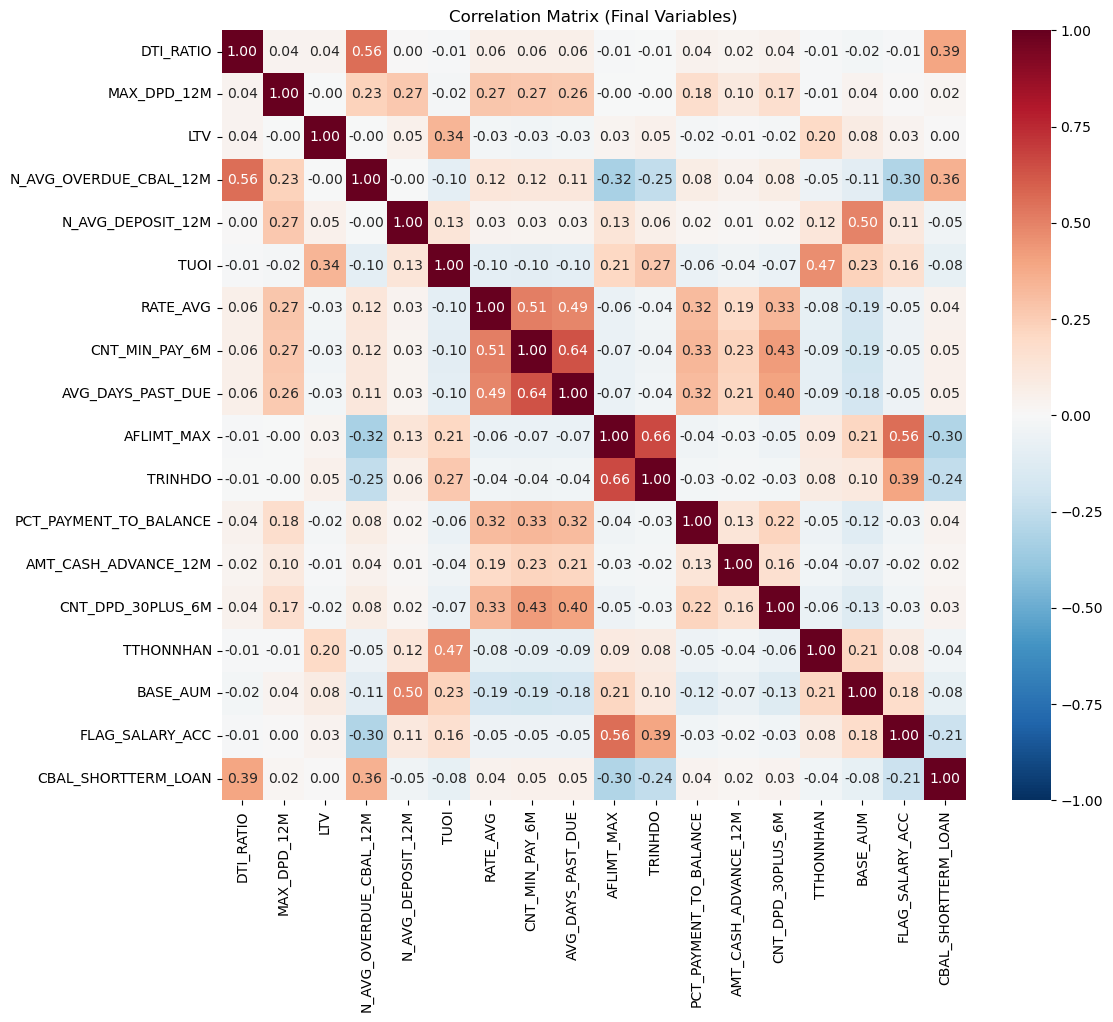

In [7]:
print("\n[BƯỚC 4] Kiểm tra tương quan và loại bỏ biến (Threshold = 0.7, Ưu tiên DTI)...")

# --- 1. CHUẨN BỊ DANH SÁCH BIẾN ---
# Lấy danh sách các biến còn lại trong dictionary (đã được clean ở bước 3.5)
available_vars = list(binning_results.keys())

# Lấy IV để sắp xếp giảm dần
var_iv_list = []
for v in available_vars:
    iv = binning_results[v].binning_table.iv
    var_iv_list.append((v, iv))

# Sort: IV cao xếp trước
var_iv_list.sort(key=lambda x: x[1], reverse=True)
sorted_features = [x[0] for x in var_iv_list]

# --- LOGIC ƯU TIÊN: ĐƯA DTI_RATIO LÊN ĐẦU ---
priority_var = "DTI_RATIO"
if priority_var in sorted_features:
    sorted_features.remove(priority_var)
    sorted_features.insert(0, priority_var)
    print(f"  -> Đã đưa biến '{priority_var}' lên vị trí ưu tiên số 1.")
else:
    print(f"  -> Cảnh báo: '{priority_var}' không nằm trong danh sách biến (có thể đã bị loại vì IV quá thấp).")

# --- 2. TÍNH TOÁN WOE ---
print(f"  -> Đang tính toán WoE cho {len(sorted_features)} biến...")
df_woe = pd.DataFrame()

for feature in sorted_features:
    try:
        optb = binning_results[feature]
        
        # Preprocessing (Quan trọng: phải khớp với lúc train)
        is_categorical = (optb.dtype == "categorical")
        x_raw = train[feature].copy()
        
        if is_categorical:
            x_clean = x_raw.astype(str).replace('nan', 'Missing').fillna("Missing")
        else:
            x_clean = x_raw # Numerical
            
        # Transform sang WoE
        df_woe[feature] = optb.transform(x_clean, metric="woe")
        
    except Exception as e:
        print(f"  -> Lỗi transform biến {feature}: {e}")

# --- 3. TÍNH MA TRẬN TƯƠNG QUAN & LỌC ---
corr_matrix = df_woe.corr(method='pearson')

kept_vars = []
dropped_log = []

print(f"  -> Bắt đầu lọc tương quan...")

for candidate in sorted_features:
    is_kept = True
    reason = "Initial"
    
    # So sánh biến ứng viên với các biến ĐÃ ĐƯỢC GIỮ
    for existing_var in kept_vars:
        # Lấy hệ số tương quan
        r = corr_matrix.loc[candidate, existing_var]
        
        # Nếu tương quan quá cao (>= 0.7)
        if abs(r) >= 0.7:
            is_kept = False
            reason = f"Corr với {existing_var} (r={r:.2f})"
            break # Dừng kiểm tra, loại luôn
            
    if is_kept:
        kept_vars.append(candidate)
    else:
        # Lưu log
        candidate_iv = binning_results[candidate].binning_table.iv
        dropped_log.append({
            "Variable": candidate,
            "IV": candidate_iv,
            "Reason": reason
        })

# ============================================================
# HIỂN THỊ KẾT QUẢ
# ============================================================
print(f"\n=== KẾT QUẢ SAU KHI LỌC ĐA CỘNG TUYẾN ===")
print(f"Tổng biến đầu vào: {len(sorted_features)}")
print(f"Số biến giữ lại:   {len(kept_vars)}")
print(f"Số biến bị loại:   {len(dropped_log)}")

# 1. Danh sách bị loại
if dropped_log:
    print("\n>>> DANH SÁCH BIẾN BỊ LOẠI (CORRELATION > 0.7):")
    df_dropped = pd.DataFrame(dropped_log)
    display(df_dropped.style.format({"IV": "{:.4f}"}))

# 2. Danh sách giữ lại
print("\n>>> DANH SÁCH BIẾN CUỐI CÙNG (FINAL SELECTION):")

# Tạo bảng tổng hợp thông tin cho các biến được giữ
final_summary_data = []
for v in kept_vars:
    optb = binning_results[v]
    
    # Lấy thông tin binning để hiển thị cho đẹp
    bt = optb.binning_table.build()
    bt_clean = bt[bt['Bin'].astype(str) != 'Totals']
    valid_bins = bt_clean[bt_clean['Count'] > 0]
    
    final_summary_data.append({
        "Variable": v,
        "IV": optb.binning_table.iv,
        "Min_Bin_Pct": valid_bins['Count (%)'].min() if not valid_bins.empty else 0,
        "Max_Bin_Pct": valid_bins['Count (%)'].max() if not valid_bins.empty else 0
    })

df_final = pd.DataFrame(final_summary_data)
# Sort lại theo IV giảm dần để dễ nhìn
df_final = df_final.sort_values("IV", ascending=False).reset_index(drop=True)

display(df_final.style.format({
    "IV": "{:.4f}",
    "Min_Bin_Pct": "{:.2%}",
    "Max_Bin_Pct": "{:.2%}"
}))

# 3. Vẽ Heatmap (Chỉ vẽ nếu số lượng biến <= 30 để nhìn cho rõ)
if len(kept_vars) <= 30:
    plt.figure(figsize=(12, 10))
    sns.heatmap(df_woe[kept_vars].corr(), annot=True, fmt=".2f", cmap="RdBu_r", vmin=-1, vmax=1)
    plt.title("Correlation Matrix (Final Variables)")
    plt.show()

LASSO REGRESSION 

In [8]:
# ============================================================
# CẤU HÌNH TOÀN CỤC (CHỈNH 1 LẦN Ở ĐÂY)
# ============================================================
TARGET_LASSO_VARS = 15      # Số lượng biến giữ lại sau Lasso
BRUTE_FORCE_K_MIN = 8       # Số biến tối thiểu trong mô hình final
BRUTE_FORCE_K_MAX = 15      # Số biến tối đa
N_JOBS            = 15      # Số luồng CPU chạy song song
TARGET_COL        = target_col # Tên biến target (đã define ở đầu notebook)

# ============================================================
# BƯỚC 5: LỌC BIẾN BẰNG LASSO (PHIÊN BẢN SILENT)
# ============================================================
print(f"\n[BƯỚC 5] Chạy Lasso Regression (Giữ lại Top {TARGET_LASSO_VARS} biến)...")

# 1. Chuẩn bị dữ liệu WoE (Chạy ngầm)
X_woe_lasso = pd.DataFrame()
for feature in kept_vars:
    try:
        optb = binning_results[feature]
        x_raw = train[feature].astype(str).replace('nan', 'Missing').fillna("Missing") if optb.dtype == "categorical" else train[feature]
        X_woe_lasso[feature] = optb.transform(x_raw, metric="woe")
    except: pass

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_woe_lasso)
y = train[TARGET_COL]

# 2. Ranking biến (Chạy 1 lần duy nhất)
lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', random_state=42)
lr.fit(X_scaled, y)
coefs_abs = np.abs(lr.coef_[0])

# 3. Lấy Top biến
df_imp = pd.DataFrame({'Variable': kept_vars, 'Imp': coefs_abs}).sort_values('Imp', ascending=False)
final_vars_lasso = df_imp.head(TARGET_LASSO_VARS)['Variable'].tolist()

# Đảm bảo DTI (Force keep)
if "DTI_RATIO" in kept_vars and "DTI_RATIO" not in final_vars_lasso:
    final_vars_lasso.pop()
    final_vars_lasso.append("DTI_RATIO")

kept_vars = final_vars_lasso # Cập nhật biến toàn cục
print(f"  -> Đã xong. Danh sách {len(kept_vars)} biến được chọn: {kept_vars}")


[BƯỚC 5] Chạy Lasso Regression (Giữ lại Top 15 biến)...
  -> Đã xong. Danh sách 15 biến được chọn: ['LTV', 'MAX_DPD_12M', 'DTI_RATIO', 'TUOI', 'AFLIMT_MAX', 'AMT_CASH_ADVANCE_12M', 'TRINHDO', 'FLAG_SALARY_ACC', 'N_AVG_OVERDUE_CBAL_12M', 'N_AVG_DEPOSIT_12M', 'BASE_AUM', 'RATE_AVG', 'PCT_PAYMENT_TO_BALANCE', 'TTHONNHAN', 'CNT_MIN_PAY_6M']


In [9]:
# ============================================================
# BƯỚC 6: CHUẨN BỊ DỮ LIỆU FINAL (TRANSFORM ALL)
# ============================================================
print(f"\n[BƯỚC 6] Transform toàn bộ dữ liệu (Train/OOS/OOT) sang WoE...")

def transform_woe_silent(df, cols, binning_dict):
    out = pd.DataFrame()
    for c in cols:
        optb = binning_dict[c]
        x = df[c].astype(str).replace('nan', 'Missing').fillna("Missing") if optb.dtype == "categorical" else df[c]
        out[c] = optb.transform(x, metric="woe")
    return out

X_train_final = transform_woe_silent(train, kept_vars, binning_results)
X_oos_final   = transform_woe_silent(oos, kept_vars, binning_results)
X_oot_final   = transform_woe_silent(oot, kept_vars, binning_results)
y_train_full  = train[TARGET_COL]

# Tính sẵn Std Dev để tính Weight
std_devs = X_train_final.std()
print("  -> Đã chuẩn bị xong dữ liệu.")


[BƯỚC 6] Transform toàn bộ dữ liệu (Train/OOS/OOT) sang WoE...
  -> Đã chuẩn bị xong dữ liệu.


In [10]:
# ============================================================
# BƯỚC 7: VÉT CẠN TỔ HỢP (BRUTE-FORCE OPTIMIZED)
# ============================================================
print(f"\n[BƯỚC 7] Chạy Brute-force ({BRUTE_FORCE_K_MIN}-{BRUTE_FORCE_K_MAX} biến) trên {N_JOBS} luồng CPU...")

# Worker Function
def process_combo(cols_idx, feature_names, X_data, y_data, stds):
    vars_names = feature_names[list(cols_idx)]
    X_sub = X_data[vars_names]
    
    # Fit
    clf = LogisticRegression(penalty='l2', C=1e9, solver='liblinear', random_state=42)
    clf.fit(X_sub, y_data)
    coefs = clf.coef_[0]
    
    # Check 1: Dấu
    if np.any(coefs >= 0): return None
    
    # Check 2: Weight (3% - 35%)
    imp = np.abs(coefs * stds[vars_names].values)
    total = imp.sum()
    if total == 0: return None
    w = (imp / total) * 100
    if np.any(w < 3) or np.any(w > 35): return None
    
    # Check 3: Gini > 50%
    pred = clf.predict_proba(X_sub)[:, 1]
    gini = 2 * roc_auc_score(y_data, pred) - 1
    if gini < 0.5: return None
    
    return (len(vars_names), list(vars_names), coefs, w, gini)

# Main Loop
feature_names_arr = np.array(kept_vars)
combos = []
for k in range(BRUTE_FORCE_K_MIN, min(BRUTE_FORCE_K_MAX, len(kept_vars)) + 1):
    combos.extend(itertools.combinations(range(len(kept_vars)), k))

print(f"  -> Tổng số mô hình cần kiểm tra: {len(combos)}")
print("  -> Đang xử lý (vui lòng chờ)...")

# Chạy song song (verbose=1: Chỉ hiện progress bar gọn gàng)
results = Parallel(n_jobs=N_JOBS, verbose=1)(
    delayed(process_combo)(c, feature_names_arr, X_train_final, y_train_full, std_devs) for c in combos
)

valid_models = [r for r in results if r is not None]
print(f"  -> Hoàn tất! Tìm thấy {len(valid_models)} mô hình đạt chuẩn.")


[BƯỚC 7] Chạy Brute-force (8-15 biến) trên 15 luồng CPU...
  -> Tổng số mô hình cần kiểm tra: 16384
  -> Đang xử lý (vui lòng chờ)...


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    9.2s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:   36.8s
[Parallel(n_jobs=15)]: Done 420 tasks      | elapsed:  1.4min
[Parallel(n_jobs=15)]: Done 770 tasks      | elapsed:  2.4min
[Parallel(n_jobs=15)]: Done 1220 tasks      | elapsed:  3.7min
[Parallel(n_jobs=15)]: Done 1770 tasks      | elapsed:  5.2min
[Parallel(n_jobs=15)]: Done 2420 tasks      | elapsed:  6.8min
[Parallel(n_jobs=15)]: Done 3170 tasks      | elapsed:  8.6min
[Parallel(n_jobs=15)]: Done 4020 tasks      | elapsed: 10.4min
[Parallel(n_jobs=15)]: Done 4970 tasks      | elapsed: 12.4min
[Parallel(n_jobs=15)]: Done 6020 tasks      | elapsed: 14.5min
[Parallel(n_jobs=15)]: Done 7170 tasks      | elapsed: 17.7min
[Parallel(n_jobs=15)]: Done 8420 tasks      | elapsed: 21.6min
[Parallel(n_jobs=15)]: Done 9770 tasks      | elapsed: 25.3min
[Parallel(n_jobs=15)]: Done 11220 tasks      

  -> Hoàn tất! Tìm thấy 247 mô hình đạt chuẩn.


[Parallel(n_jobs=15)]: Done 16384 out of 16384 | elapsed: 44.9min finished


In [11]:
# ============================================================
# BƯỚC 8: CHỌN MÔ HÌNH TỐT NHẤT & VALIDATE
# ============================================================
if valid_models:
    # Convert to DF & Sort
    df_res = pd.DataFrame(valid_models, columns=['Num_Vars', 'Vars', 'Coefs', 'Weights', 'Gini_Train'])
    df_res = df_res.sort_values('Gini_Train', ascending=False).reset_index(drop=True)
    
    # Lấy Best Model (Rank 1)
    best_row = df_res.iloc[0]
    best_vars = best_row['Vars']
    
    print(f"\n[BƯỚC 8] KẾT QUẢ FINAL (Mô hình Rank 1/Top {len(valid_models)})")
    print("-" * 60)
    print(f"Danh sách biến ({len(best_vars)}): {best_vars}")
    
    # Validate OOS/OOT
    def get_gini(X, y, model_cols, model_obj):
        # Lưu ý: model_obj là Logit của statsmodels nên cần add_constant
        X_new = sm.add_constant(X[model_cols])
        pred = model_obj.predict(X_new)
        return 2 * roc_auc_score(y, pred) - 1

    # Fit lại bằng Statsmodels để ra report đẹp
    X_train_best = sm.add_constant(X_train_final[best_vars])
    final_logit = sm.Logit(y_train_full, X_train_best).fit(disp=0)
    
    # Tính Gini các tập
    g_train = 2 * roc_auc_score(y_train_full, final_logit.predict(X_train_best)) - 1
    
    X_oos_best = sm.add_constant(X_oos_final[best_vars])
    g_oos = 2 * roc_auc_score(oos[TARGET_COL], final_logit.predict(X_oos_best)) - 1
    
    X_oot_best = sm.add_constant(X_oot_final[best_vars])
    g_oot = 2 * roc_auc_score(oot[TARGET_COL], final_logit.predict(X_oot_best)) - 1
    
    # In bảng kết quả gọn đẹp
    print("-" * 60)
    print(f"{'METRIC':<10} | {'VALUE':<10} | {'NOTES'}")
    print("-" * 60)
    print(f"{'Gini Train':<10} | {g_train:.2%}    |")
    print(f"{'Gini OOS':<10} | {g_oos:.2%}    | Diff: {g_train - g_oos:.2%}")
    print(f"{'Gini OOT':<10} | {g_oot:.2%}    | Diff: {g_train - g_oot:.2%}")
    print("-" * 60)
    
    if (g_train - g_oos > 0.1) or (g_train - g_oot > 0.1):
        print("⚠️ CẢNH BÁO: Có dấu hiệu Overfitting!")
    else:
        print("✅ KẾT QUẢ TỐT: Mô hình ổn định.")

    # In bảng hệ số và trọng số
    print("\n>>> CHI TIẾT BIẾN & TRỌNG SỐ:")
    res_detail = pd.DataFrame({
        'Variable': best_vars,
        'Coef': final_logit.params.drop('const').values,
        'P-value': final_logit.pvalues.drop('const').values,
        'Weight(%)': best_row['Weights']
    }).sort_values('Weight(%)', ascending=False)
    
    display(res_detail.style.format({
        'Coef': '{:.4f}', 'P-value': '{:.4f}', 'Weight(%)': '{:.2f}'
    }))
    
else:
    print("❌ Không tìm thấy mô hình nào thỏa mãn tiêu chí.")


[BƯỚC 8] KẾT QUẢ FINAL (Mô hình Rank 1/Top 247)
------------------------------------------------------------
Danh sách biến (10): [np.str_('DTI_RATIO'), np.str_('TUOI'), np.str_('AFLIMT_MAX'), np.str_('AMT_CASH_ADVANCE_12M'), np.str_('FLAG_SALARY_ACC'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('RATE_AVG'), np.str_('PCT_PAYMENT_TO_BALANCE'), np.str_('CNT_MIN_PAY_6M')]
------------------------------------------------------------
METRIC     | VALUE      | NOTES
------------------------------------------------------------
Gini Train | 55.47%    |
Gini OOS   | 55.79%    | Diff: -0.33%
Gini OOT   | 54.96%    | Diff: 0.51%
------------------------------------------------------------
✅ KẾT QUẢ TỐT: Mô hình ổn định.

>>> CHI TIẾT BIẾN & TRỌNG SỐ:


,Variable,Coef,P-value,Weight(%)
0,DTI_RATIO,-0.7857,0.0000,22.64
5,N_AVG_OVERDUE_CBAL_12M,-0.6352,0.0000,15.38
1,TUOI,-1.0432,0.0000,14.70
6,N_AVG_DEPOSIT_12M,-0.8509,0.0000,13.60
7,RATE_AVG,-0.6135,0.0000,8.39
2,AFLIMT_MAX,-0.8401,0.0000,7.68
9,CNT_MIN_PAY_6M,-0.5541,0.0000,6.62
3,AMT_CASH_ADVANCE_12M,-0.6085,0.0000,4.42
8,PCT_PAYMENT_TO_BALANCE,-0.3983,0.0000,3.48
4,FLAG_SALARY_ACC,-0.5094,0.0000,3.09


In [12]:
# ============================================================
# BƯỚC CUỐI (SỬA ĐỔI): Tự tạo ID nếu không có CASE_ID
# ============================================================

# 1. Reset index để lấy Index làm ID (đặt tên là CASE_ID cho thống nhất)
train_reset = train.reset_index().rename(columns={'index': 'CASE_ID'})
oos_reset   = oos.reset_index().rename(columns={'index': 'CASE_ID'})
oot_reset   = oot.reset_index().rename(columns={'index': 'CASE_ID'})

# Đánh dấu nguồn (để sau này tính Gini riêng)
train_reset['DATA_TYPE'] = 'TRAIN'
oos_reset['DATA_TYPE']   = 'OOS'
oot_reset['DATA_TYPE']   = 'OOT'

# 2. Chọn biến ID thực tế (Nếu bạn có SOCIF thì dùng SOCIF, không thì dùng cái CASE_ID vừa tạo)
ID_COL = "SOCIF" if "SOCIF" in train.columns else "CASE_ID"

# 3. Gộp dữ liệu
# Lưu ý: Thêm DATA_TYPE vào export để sau này tính Gini riêng từng tập
needed_cols = [ID_COL, "SEGMENT", "DATA_TYPE", TARGET_COL] + best_vars
df_full_seg = pd.concat([
    train_reset[needed_cols] if ID_COL == "CASE_ID" else train[needed_cols], 
    oos_reset[needed_cols] if ID_COL == "CASE_ID" else oos[needed_cols], 
    oot_reset[needed_cols] if ID_COL == "CASE_ID" else oot[needed_cols]
], axis=0).reset_index(drop=True)

# 4. Transform & Predict (Giữ nguyên)
X_woe_full = pd.DataFrame()
for col in best_vars:
    optb = binning_results[col]
    x_raw = df_full_seg[col].astype(str).replace('nan', 'Missing').fillna("Missing") if optb.dtype == "categorical" else df_full_seg[col]
    X_woe_full[col] = optb.transform(x_raw, metric="woe")

X_final = sm.add_constant(X_woe_full)
df_full_seg['PREDICTED_PROB'] = final_logit.predict(X_final)

# 5. Xuất file (QUAN TRỌNG: Đã thêm cột DATA_TYPE)
# Xuất thêm DATA_TYPE để tí nữa gộp 3 file lại vẫn biết đâu là Train/OOS/OOT
output_cols = [ID_COL, "SEGMENT", "DATA_TYPE", TARGET_COL, "PREDICTED_PROB"]
output_filename = f"RESULT_{2}.csv"

df_full_seg[output_cols].to_csv(output_filename, index=False)
print(f"-> Đã xuất file (kèm DATA_TYPE): {output_filename}")

-> Đã xuất file (kèm DATA_TYPE): RESULT_2.csv


In [13]:
df_res.to_csv("topmodel2.csv")